In [1]:
print("Version3")
import pandas as pd
df =pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")


Version3


In [2]:
import warnings
warnings.filterwarnings("ignore")
import warnings
from lightgbm import LGBMClassifier

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


# Check for Duplicate Rows and drop them

In [3]:
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("\nDuplicate Rows:")
#print(duplicate_rows)

# Print the number of duplicate rows
print("\nNumber of duplicate rows:", len(duplicate_rows))



Duplicate Rows:

Number of duplicate rows: 165


In [4]:

#To remove duplicates
df.drop_duplicates(inplace=True)


# Split the target and features

In [5]:
X=df.drop('target',axis=1)
y=df['target']
print(X.shape)
print(y.shape)

(99835, 75)
(99835,)


In [6]:
#setting so that the pandas prints the full dataframes

import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [7]:

#Number of unique values in each column and columns with only one unique value

unique_counts = X.nunique()
print("Number of unique values in each column:\n", unique_counts)

single_unique_value_columns = unique_counts[unique_counts == 1].index.tolist()
print("\nColumns with only one unique value:", single_unique_value_columns)


Number of unique values in each column:
 MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
IsBetaUser                                1
RealTimeProtectionState                   6
IsPassiveModeEnabled                      2
AntivirusConfigID                      1976
NumAntivirusProductsInstalled             5
NumAntivirusProductsEnabled               5
HasTpm                                    2
CountryID                               220
CityID                                16047
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease               

In [8]:
X.isna().sum()

MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

In [9]:
#find the percentage of missing values per column in X

# Calculate the percentage of missing values per column
missing_percentage = (X.isna().sum() / len(X)) * 100

# Print the results
missing_percentage

MachineID                             0.000000
ProductName                           0.000000
EngineVersion                         0.000000
AppVersion                            0.000000
SignatureVersion                      0.000000
IsBetaUser                            0.000000
RealTimeProtectionState               0.066109
IsPassiveModeEnabled                  0.000000
AntivirusConfigID                     0.076126
NumAntivirusProductsInstalled         0.076126
NumAntivirusProductsEnabled           0.076126
HasTpm                                0.000000
CountryID                             0.000000
CityID                                0.624030
GeoRegionID                           0.000000
LocaleEnglishNameID                   0.000000
PlatformType                          0.000000
Processor                             0.000000
OSVersion                             0.000000
OSBuildNumber                         0.000000
OSProductSuite                        0.000000
OsPlatformSub

# Less than 1% of values are missing in each column so impute the categorical columns using mode and Numerical columns using Mean 

In [10]:
# replace the missing values of the df with SimpleImputer according to the column , like for categorical columns use mode and for numerical use mean

import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is already loaded and preprocessed as in your example

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Create imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# Verify missing values are filled
print(X.isna().sum())

MachineID                             0
ProductName                           0
EngineVersion                         0
AppVersion                            0
SignatureVersion                      0
IsBetaUser                            0
RealTimeProtectionState               0
IsPassiveModeEnabled                  0
AntivirusConfigID                     0
NumAntivirusProductsInstalled         0
NumAntivirusProductsEnabled           0
HasTpm                                0
CountryID                             0
CityID                                0
GeoRegionID                           0
LocaleEnglishNameID                   0
PlatformType                          0
Processor                             0
OSVersion                             0
OSBuildNumber                         0
OSProductSuite                        0
OsPlatformSubRelease                  0
OSBuildLab                            0
SKUEditionName                        0
IsSystemProtected                     0


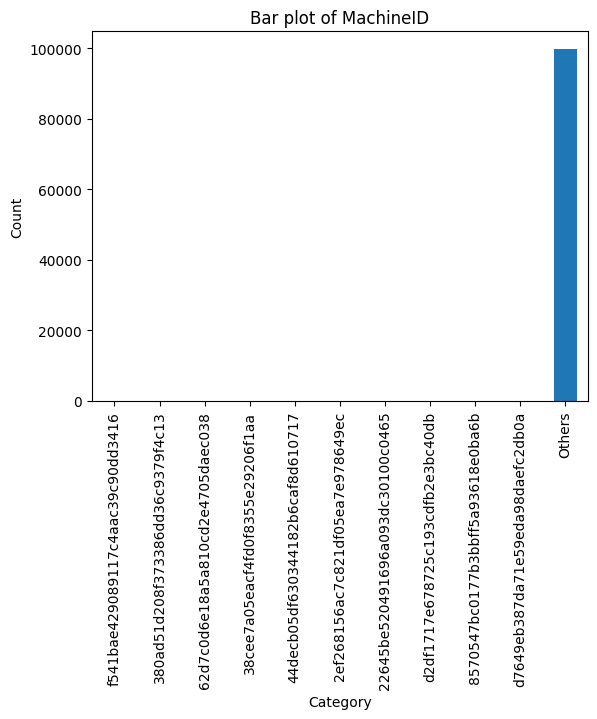

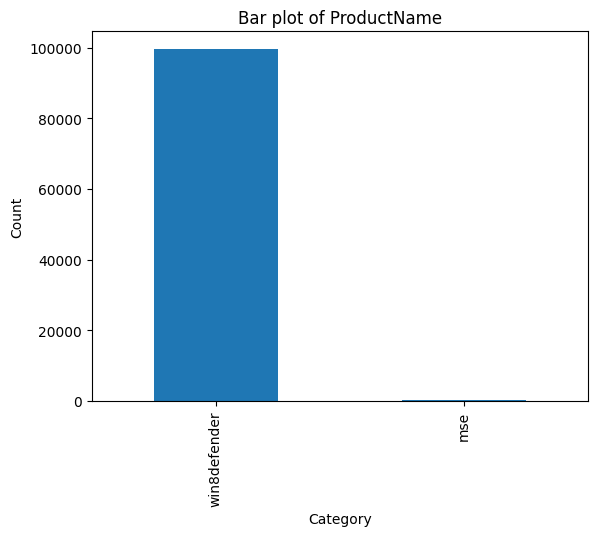

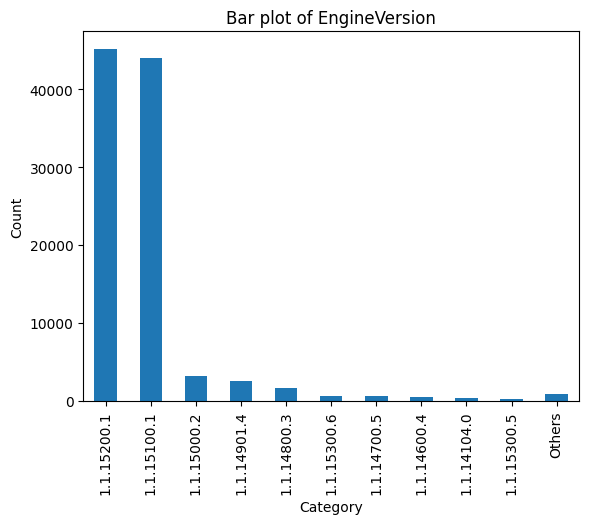

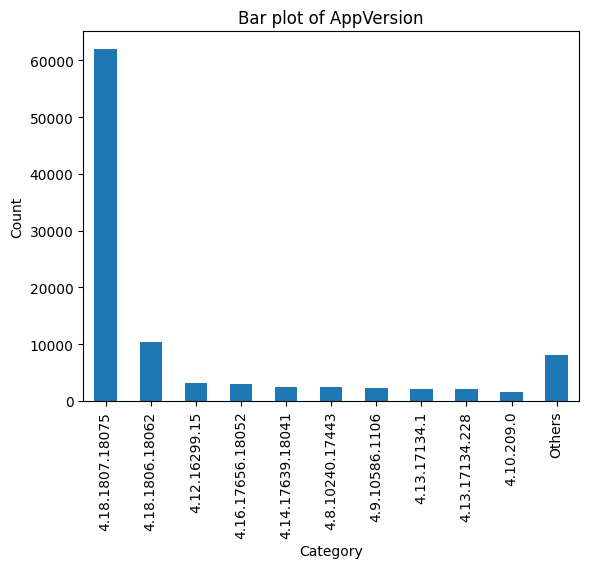

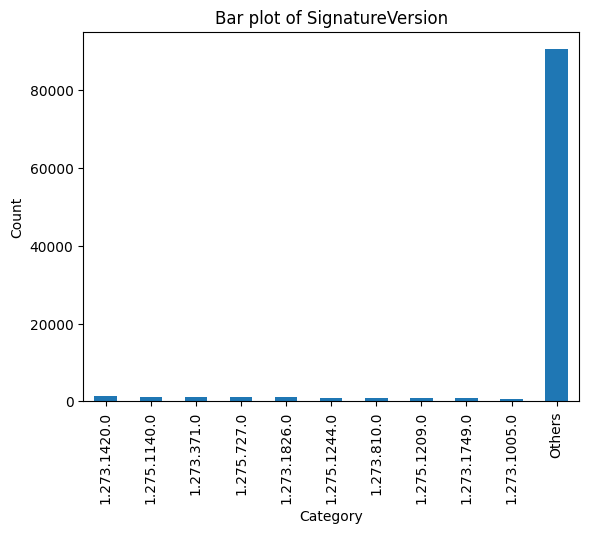

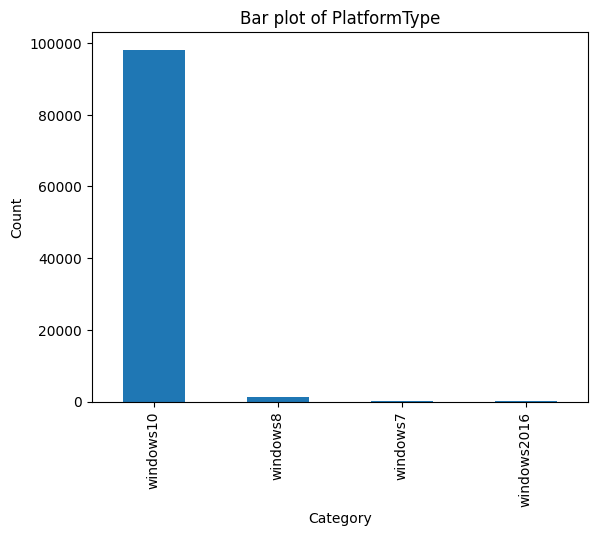

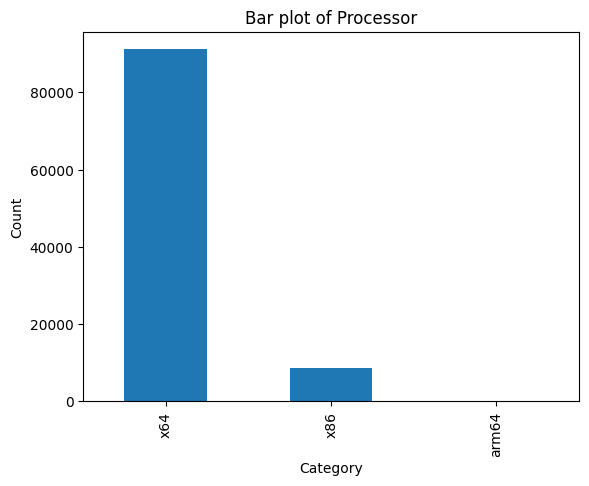

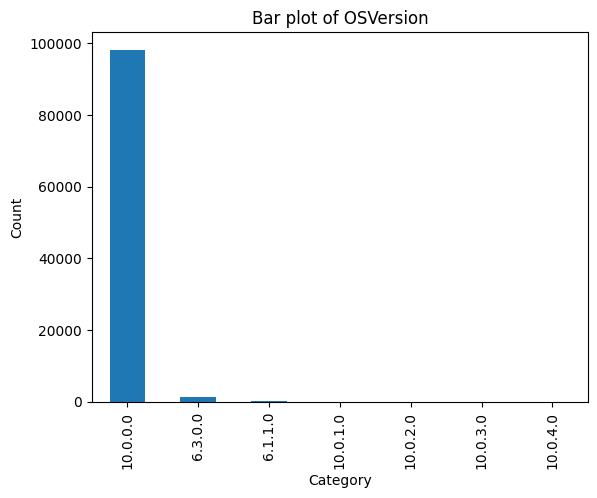

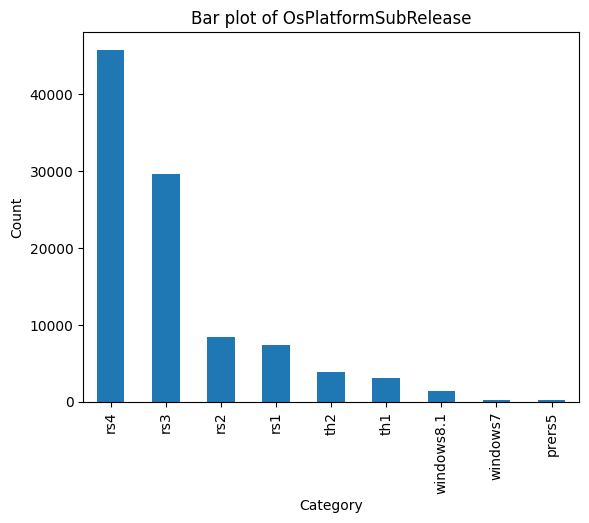

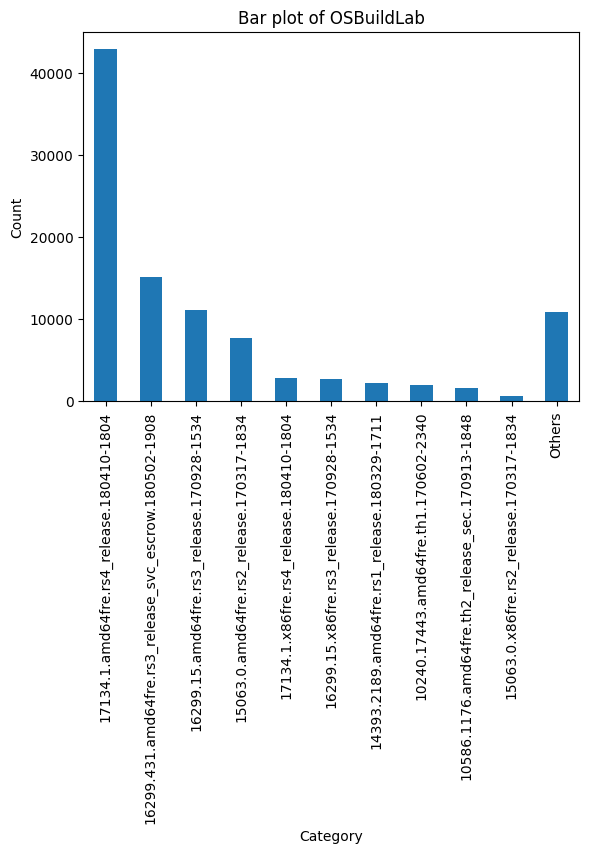

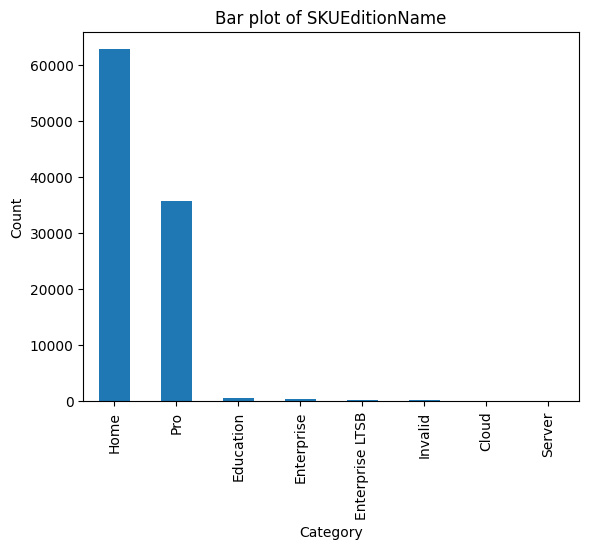

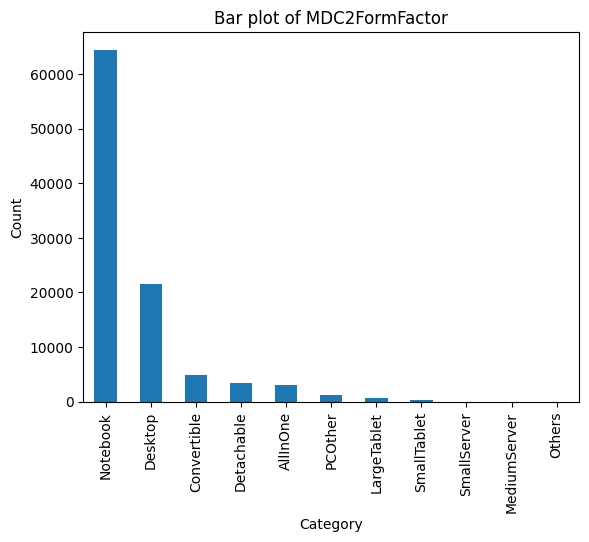

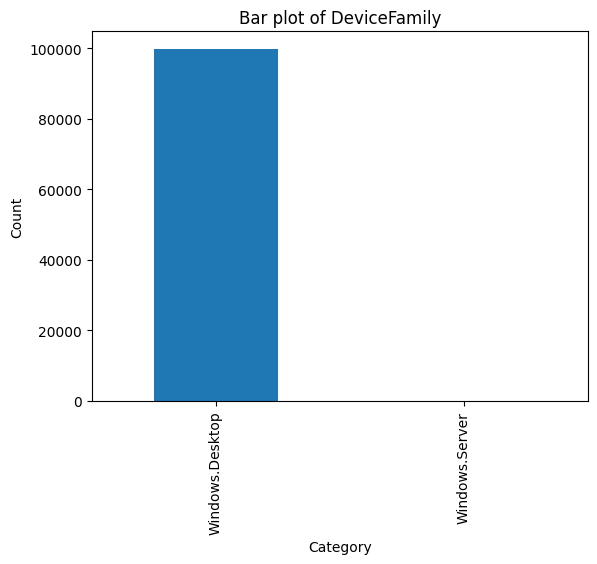

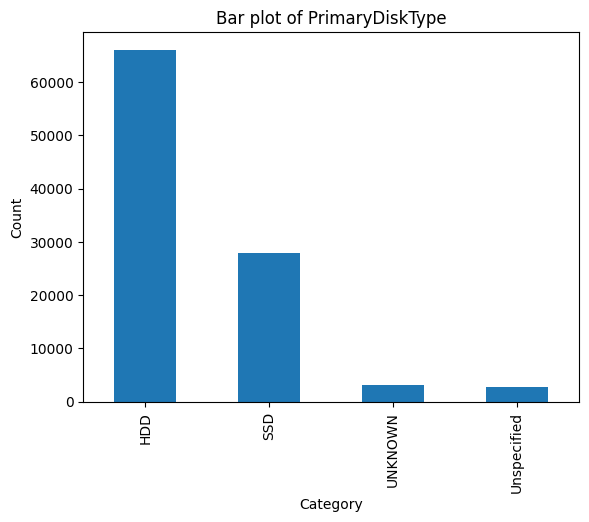

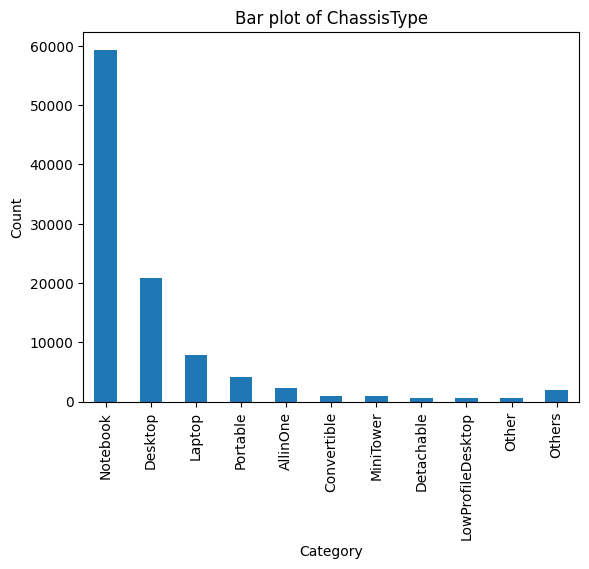

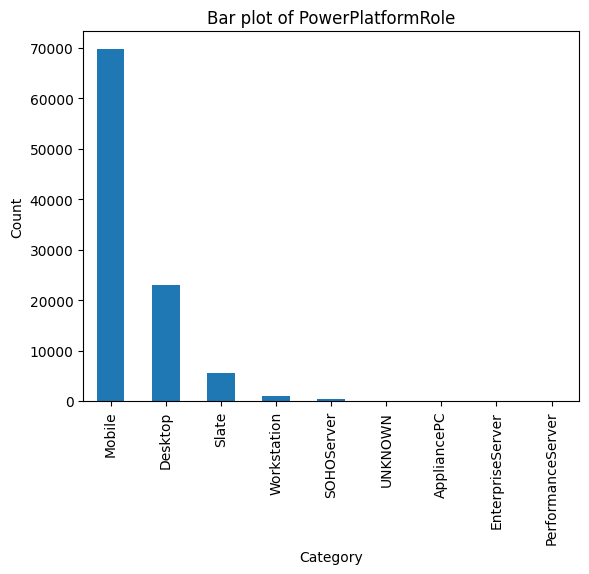

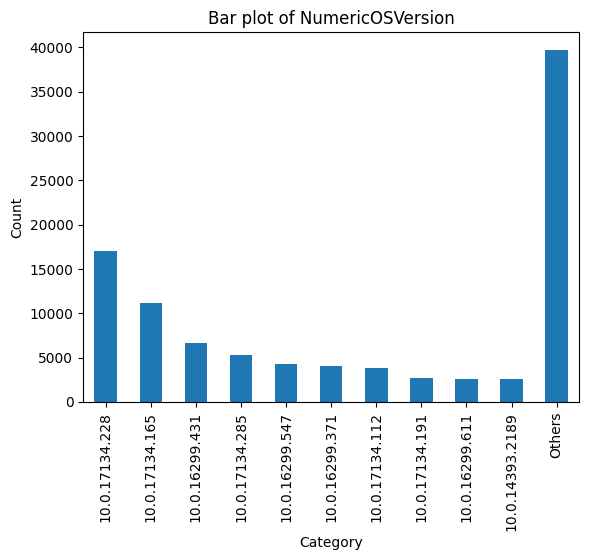

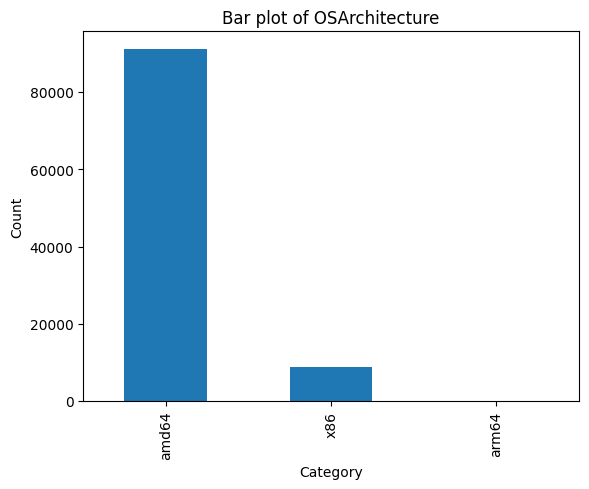

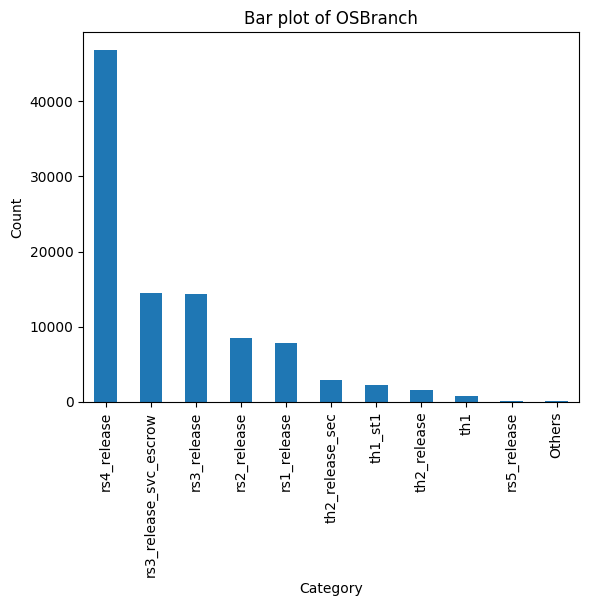

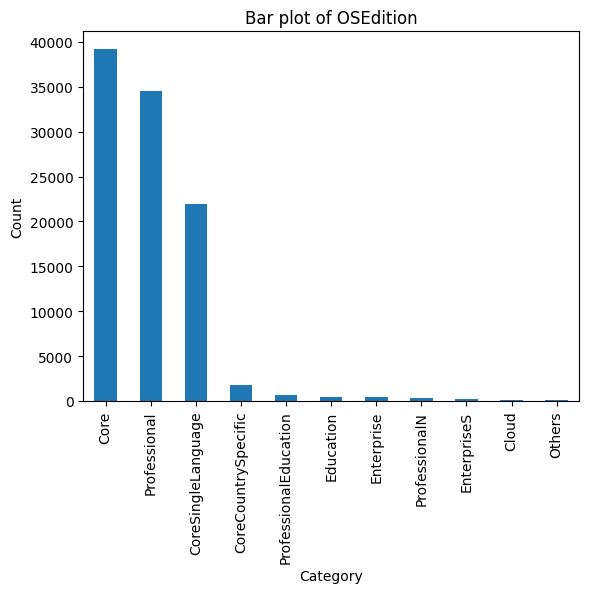

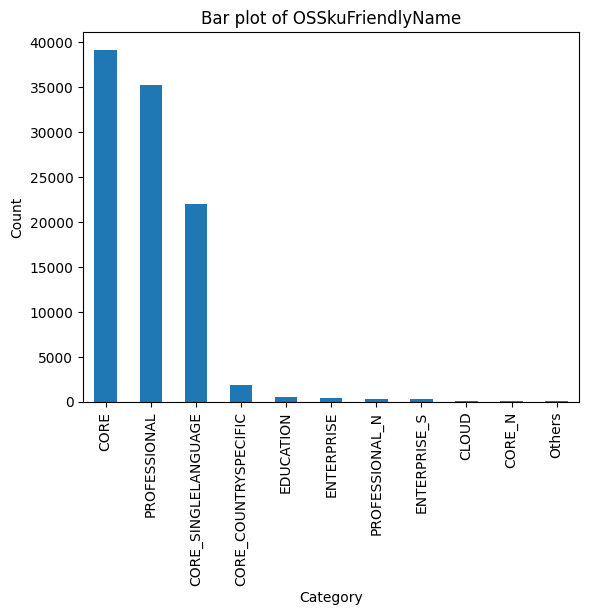

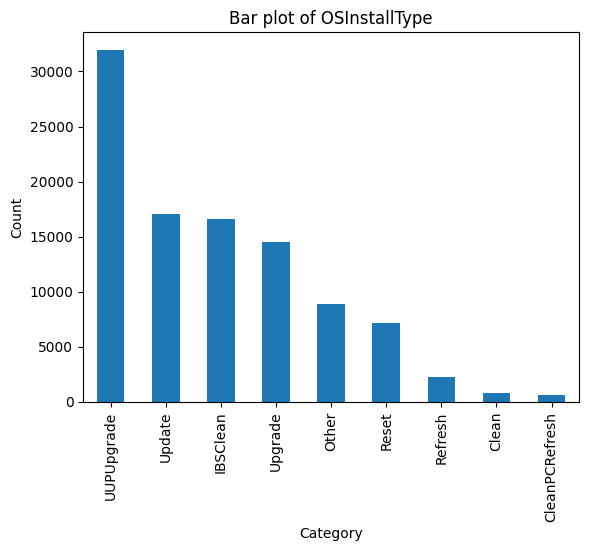

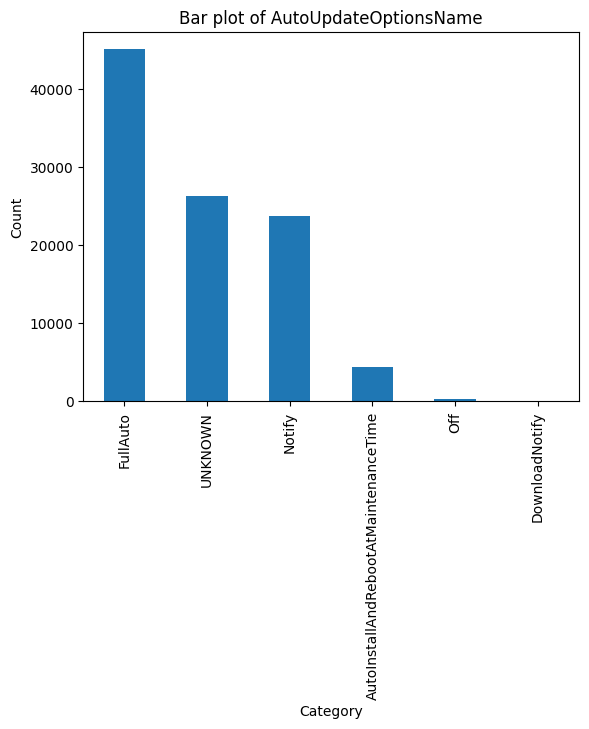

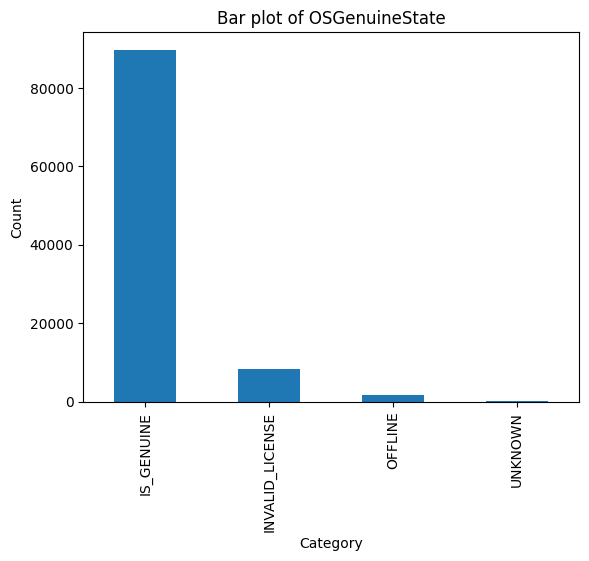

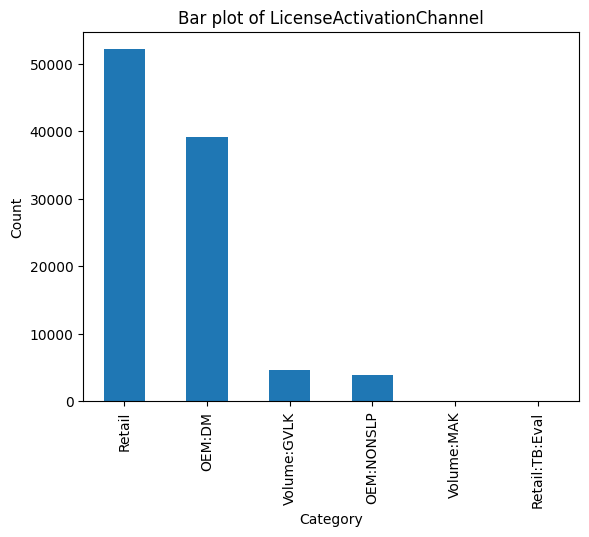

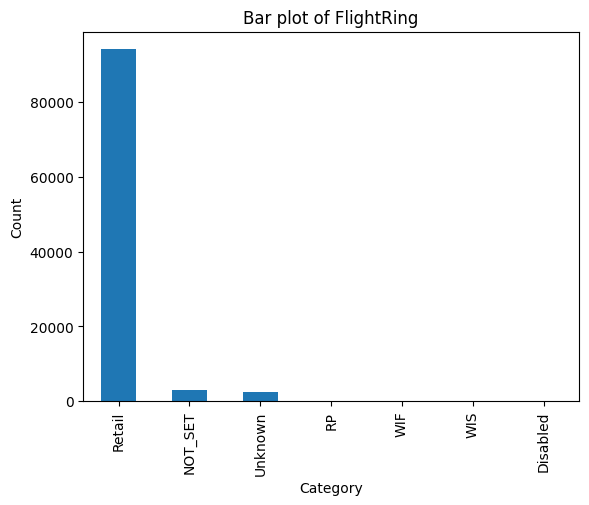

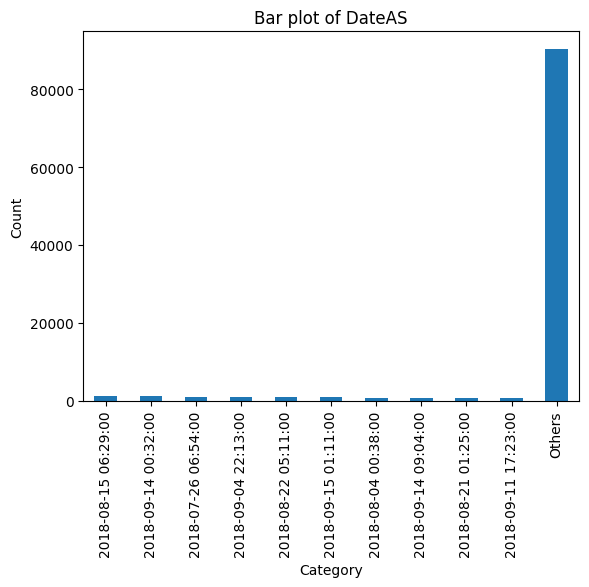

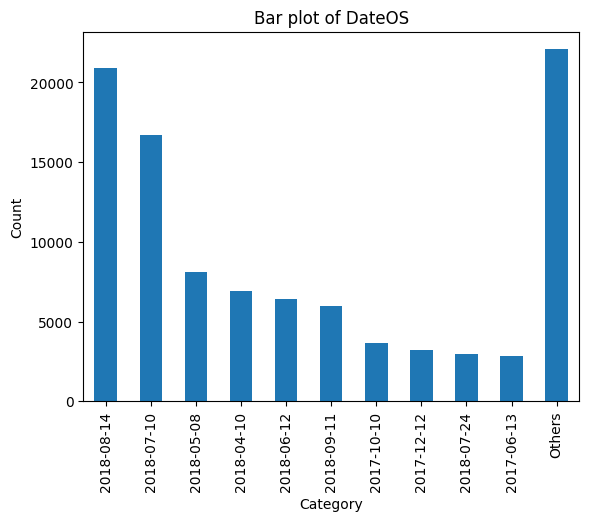

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for col in X.select_dtypes(include=['object']).columns:
    counts = X[col].value_counts()
    if len(counts) > 10:
        top_10 = counts.nlargest(10)
        others = counts[~counts.index.isin(top_10.index)].sum()
        top_10['Others'] = others
        top_10.plot(kind='bar')
    else:
        counts.plot(kind='bar')
    plt.title(f'Bar plot of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

    

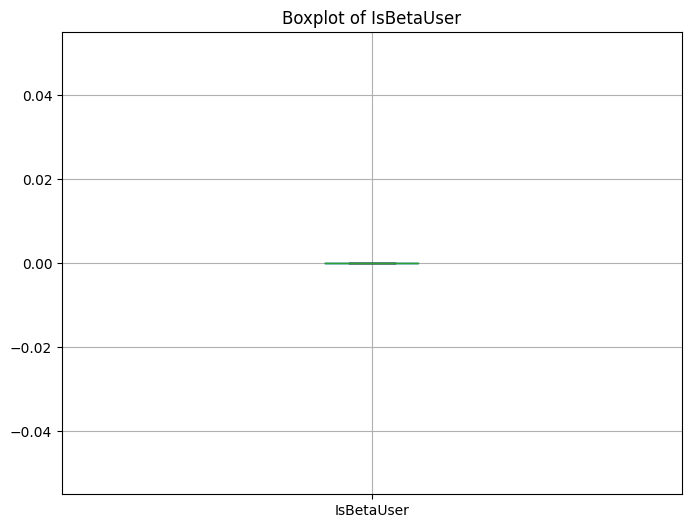

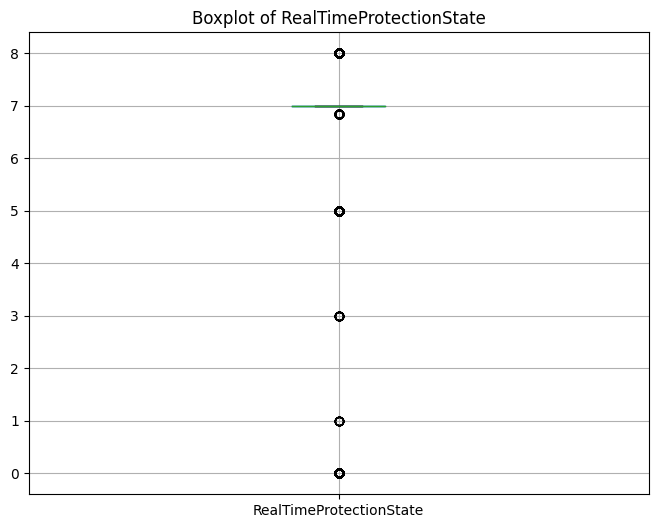

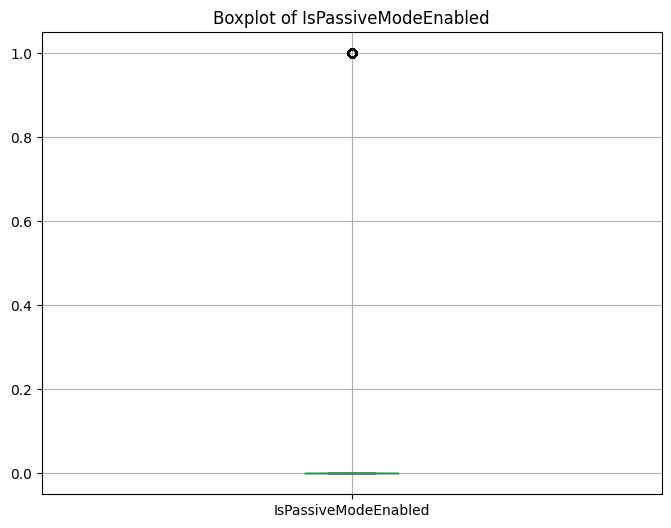

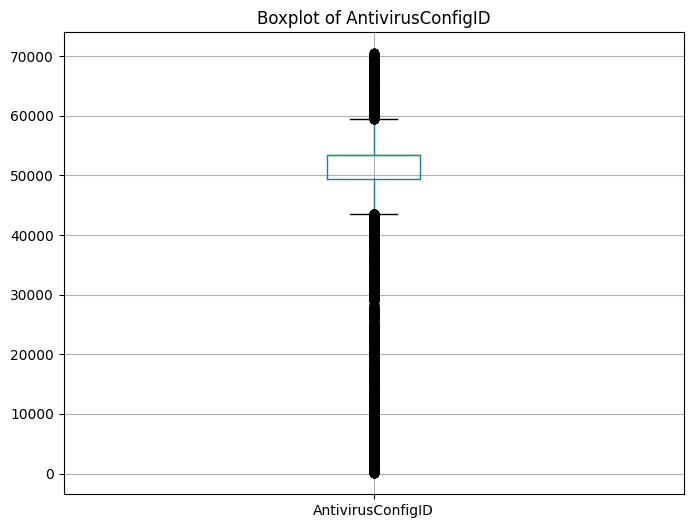

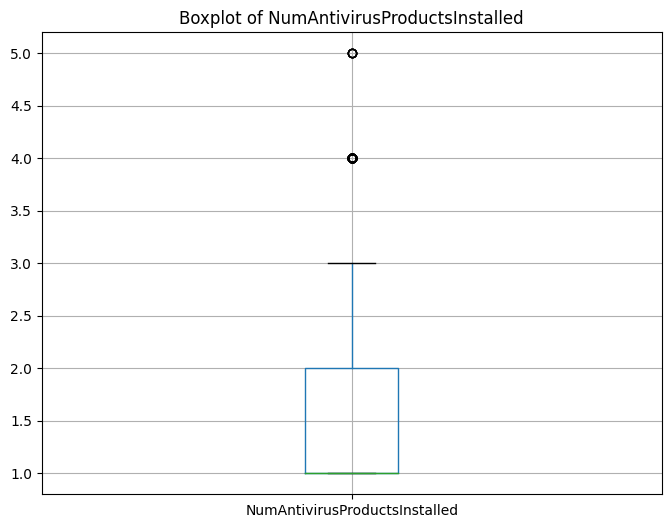

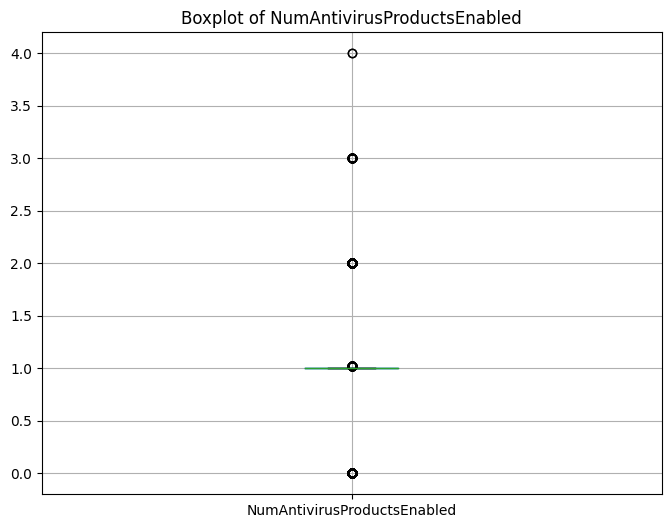

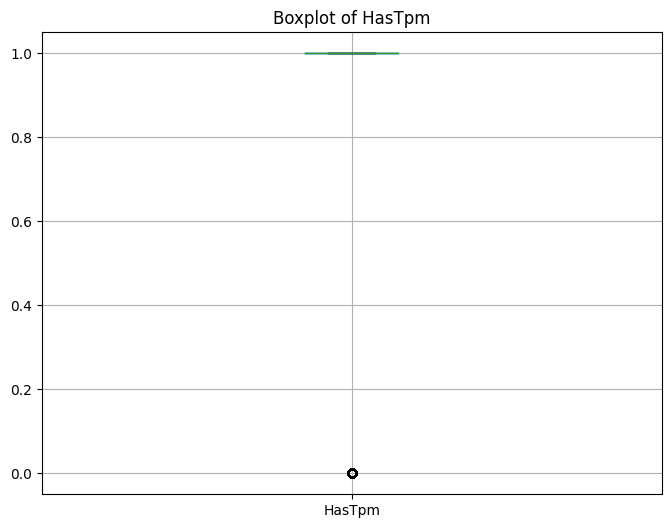

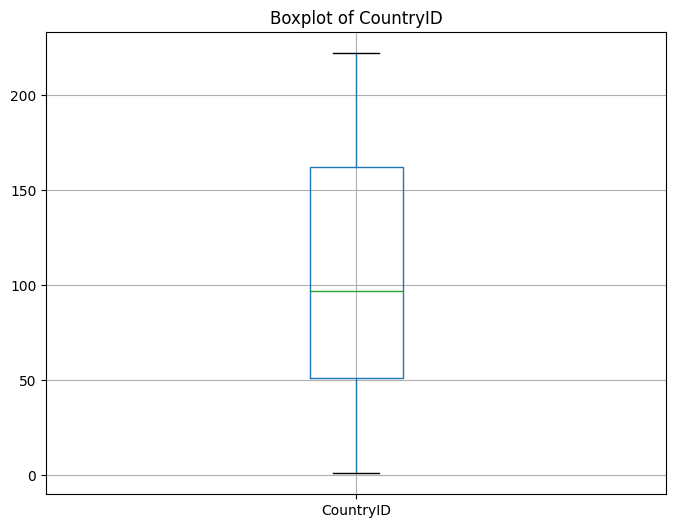

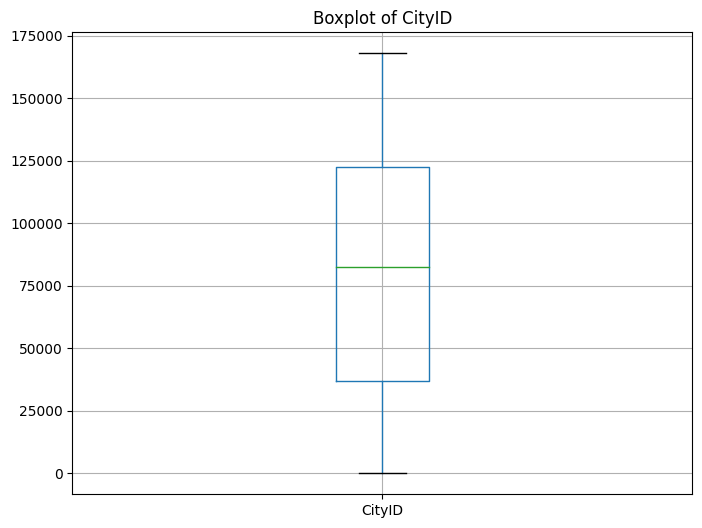

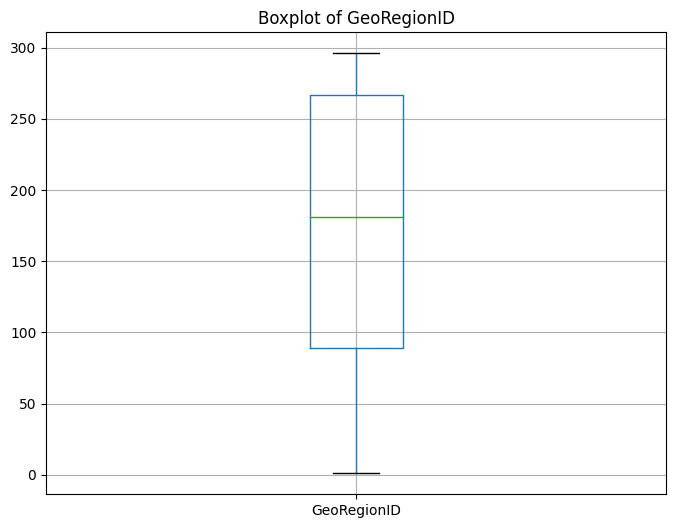

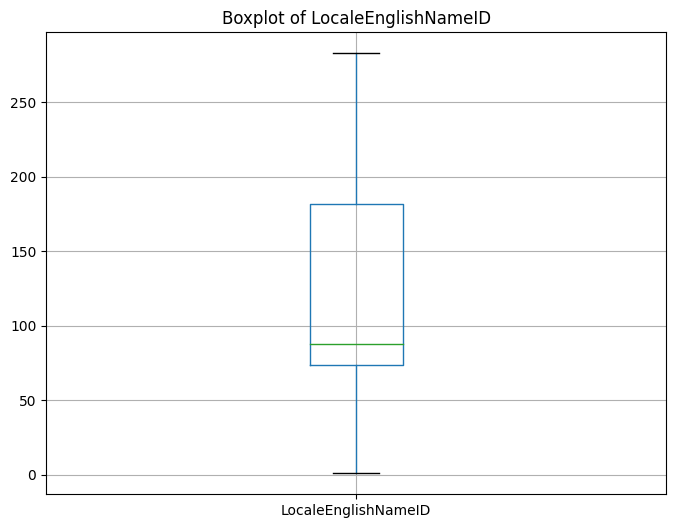

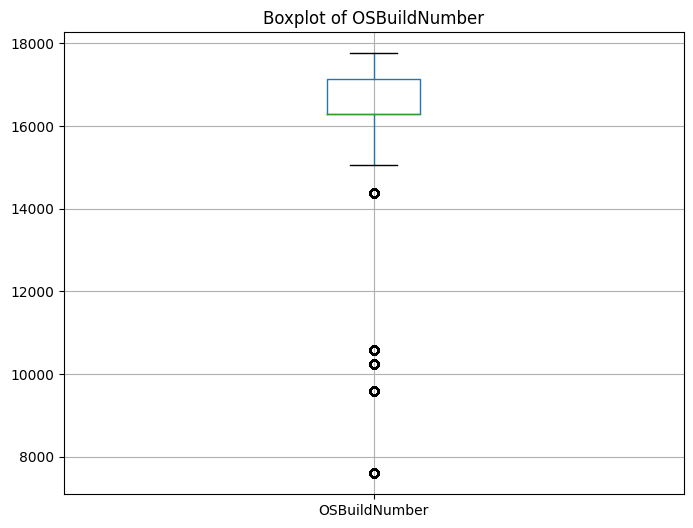

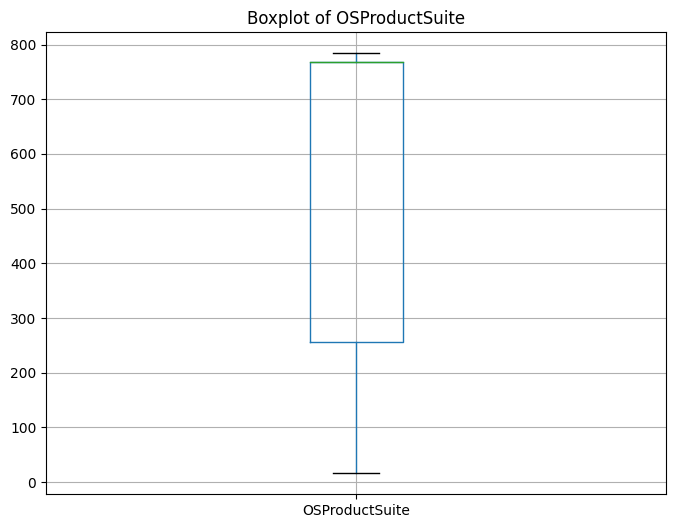

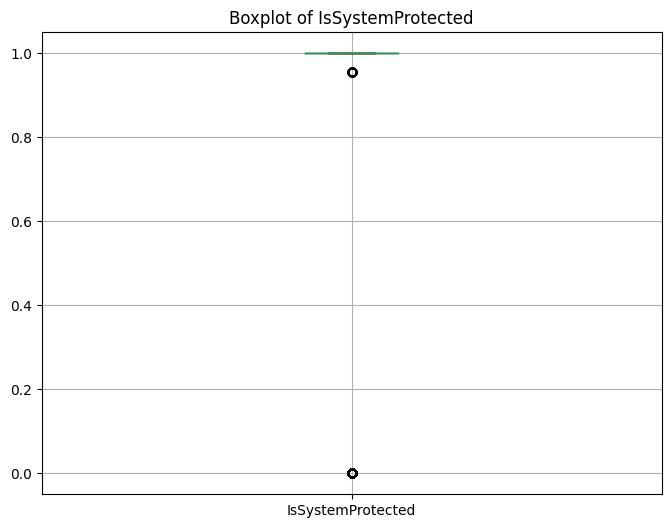

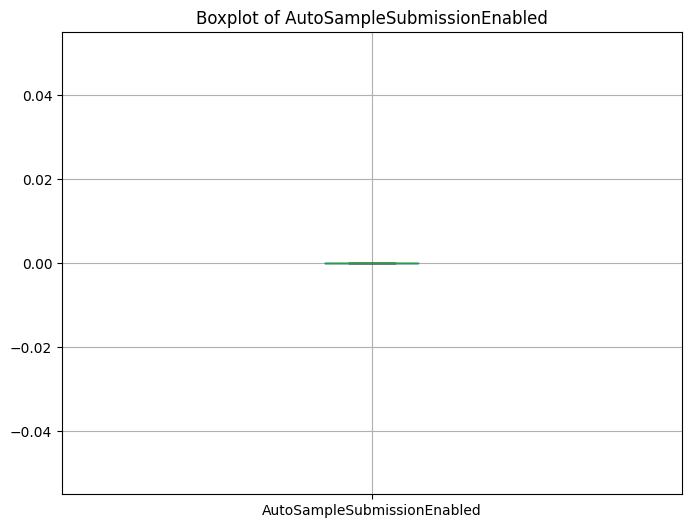

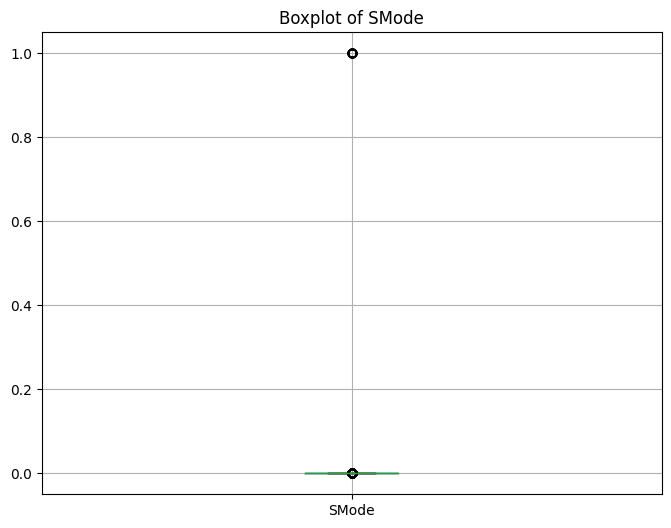

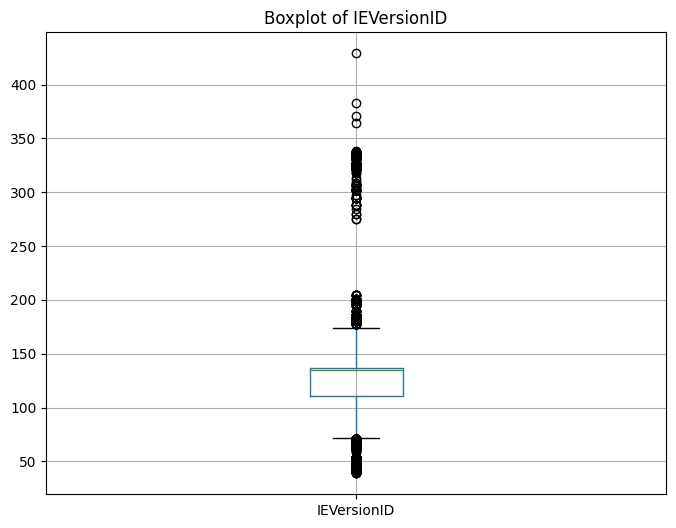

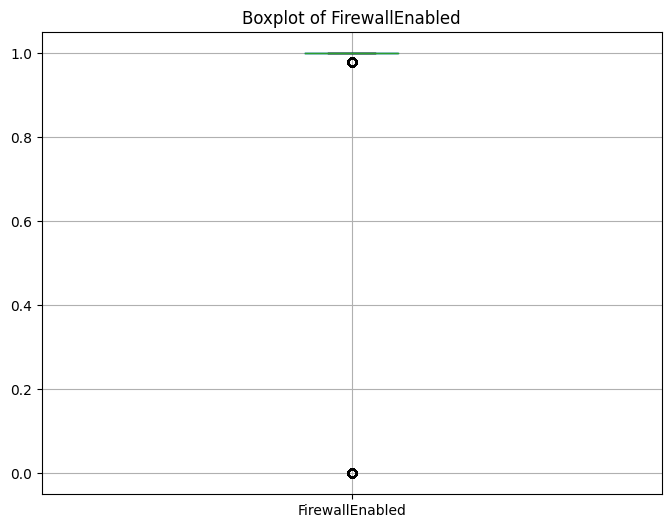

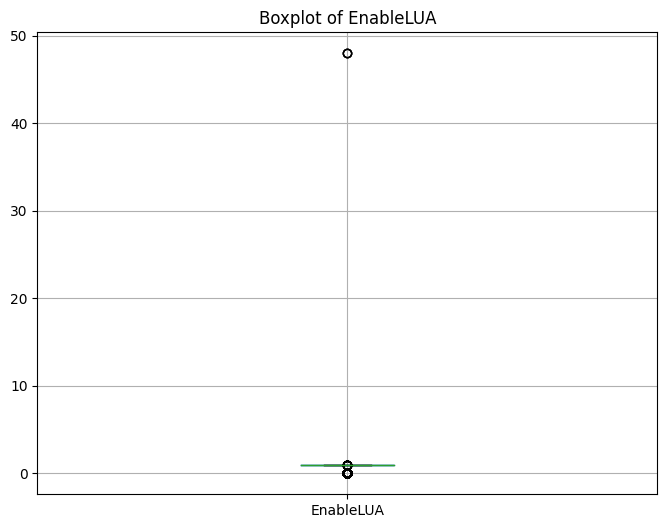

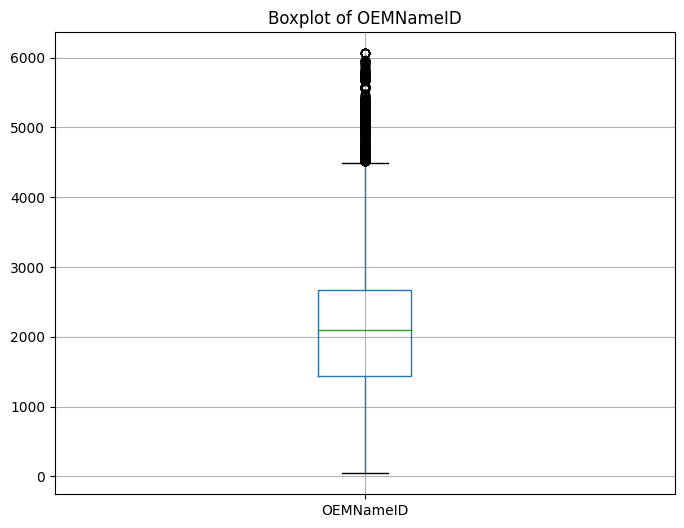

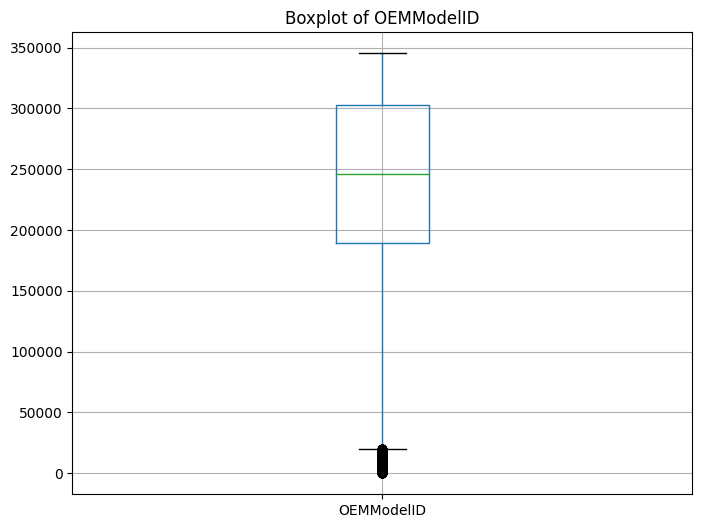

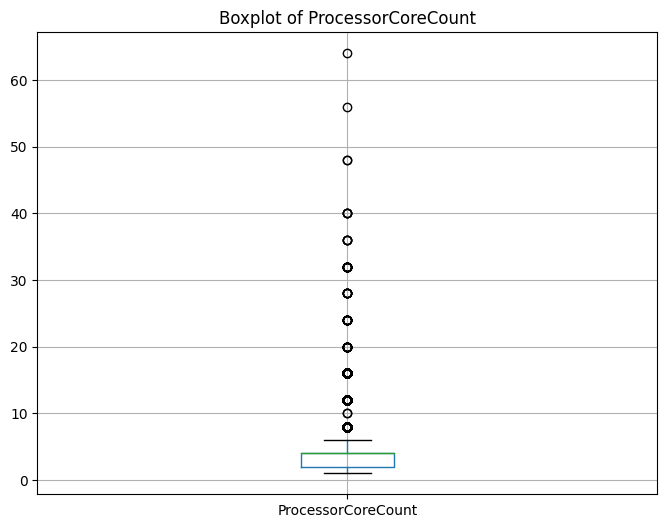

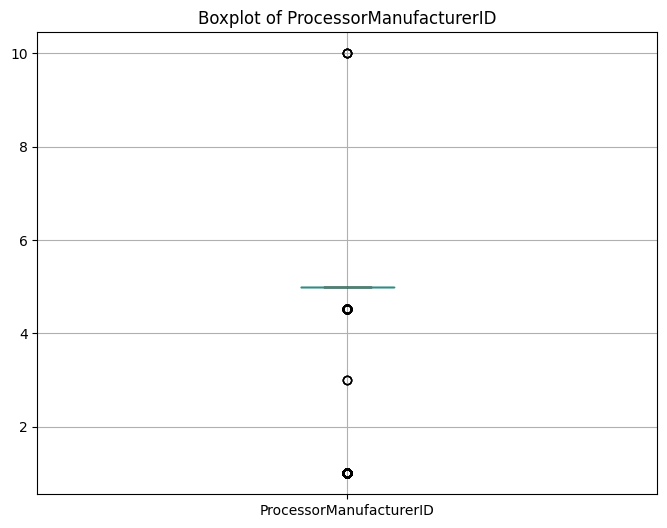

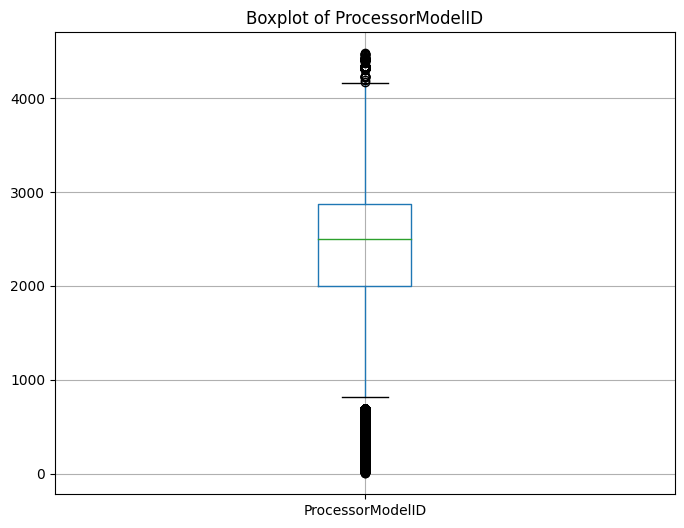

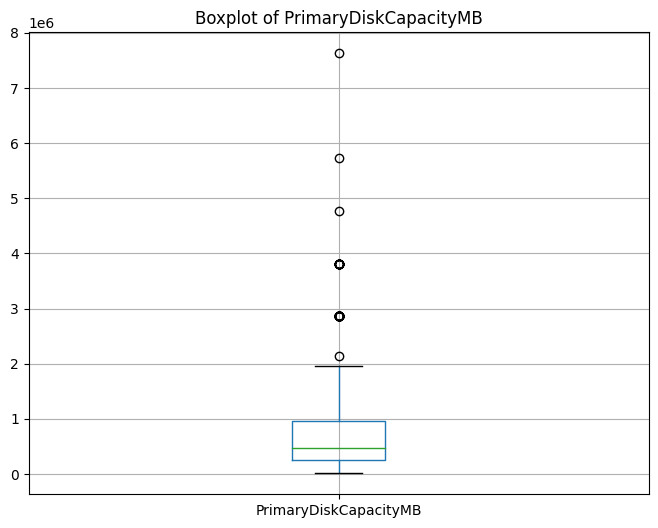

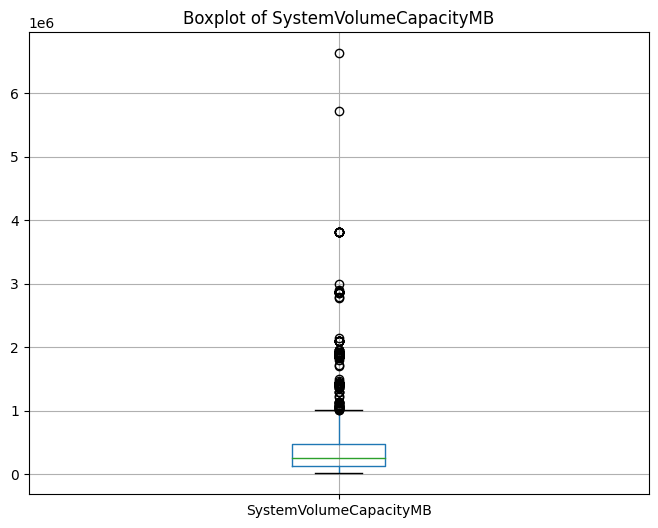

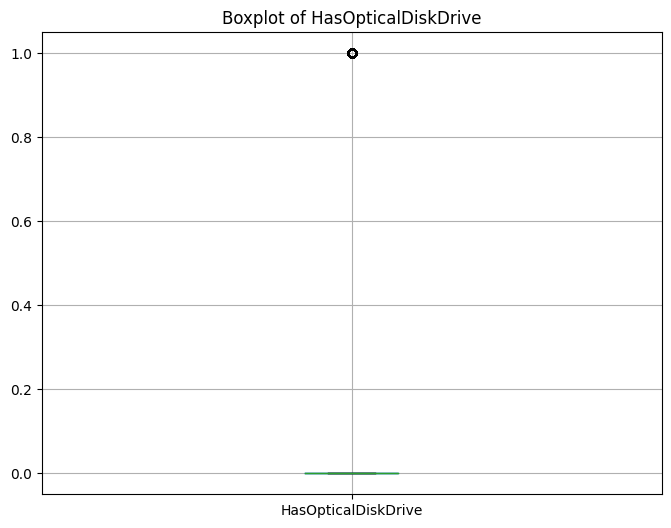

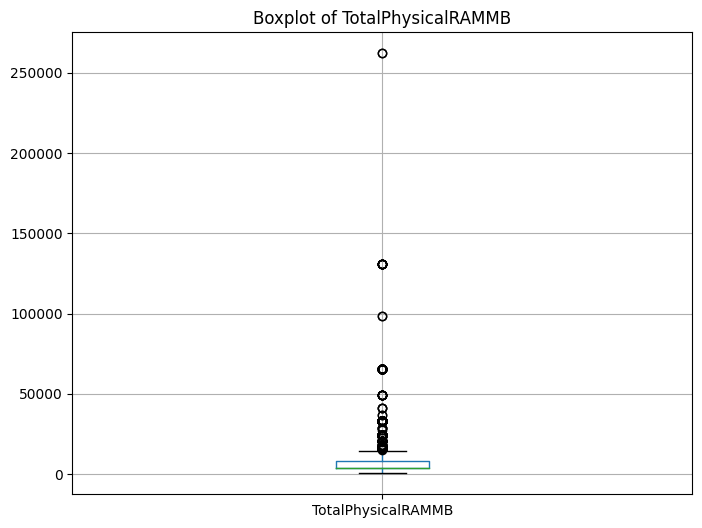

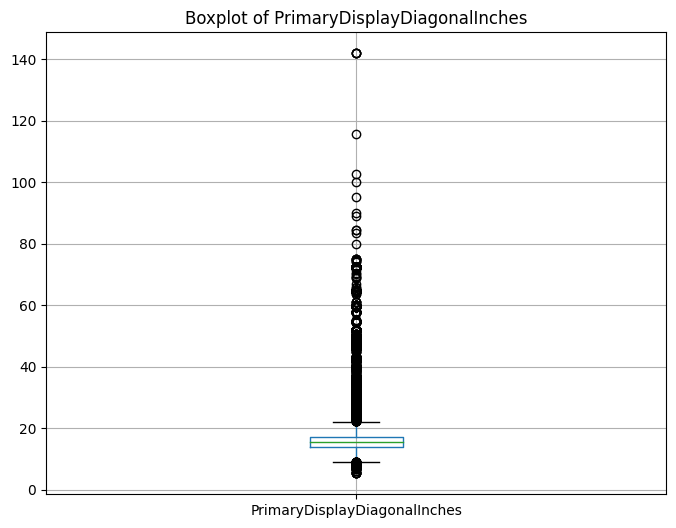

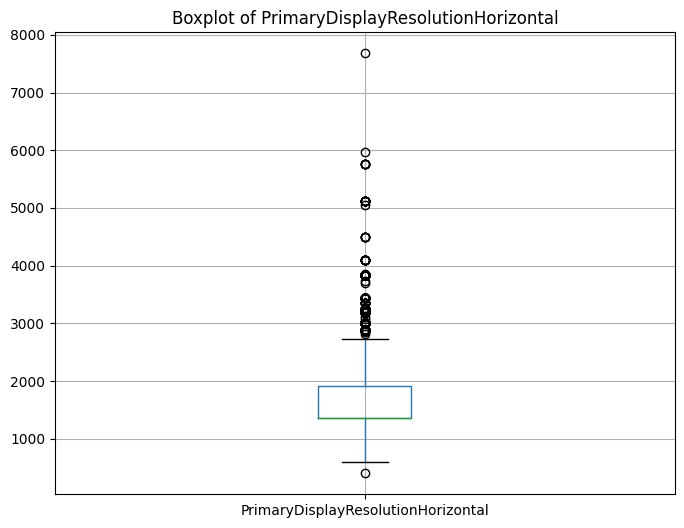

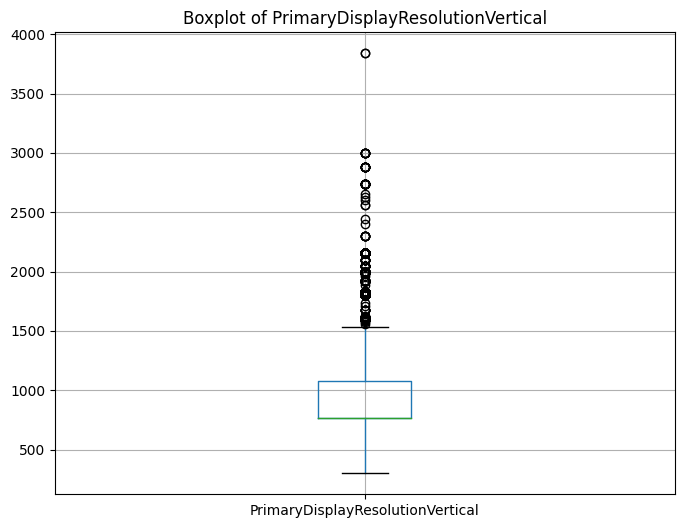

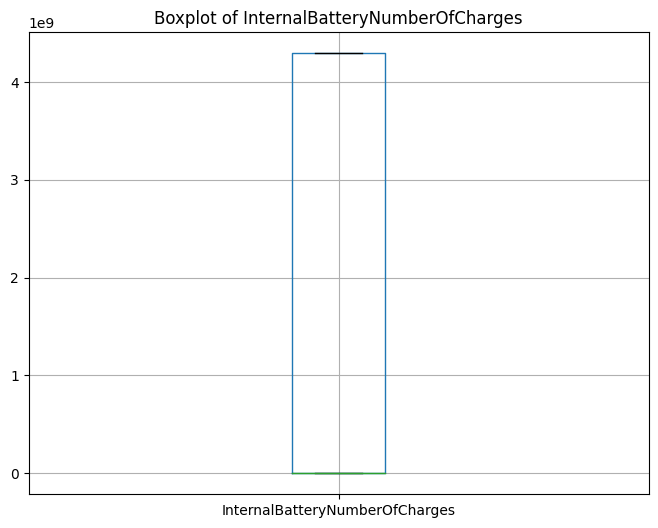

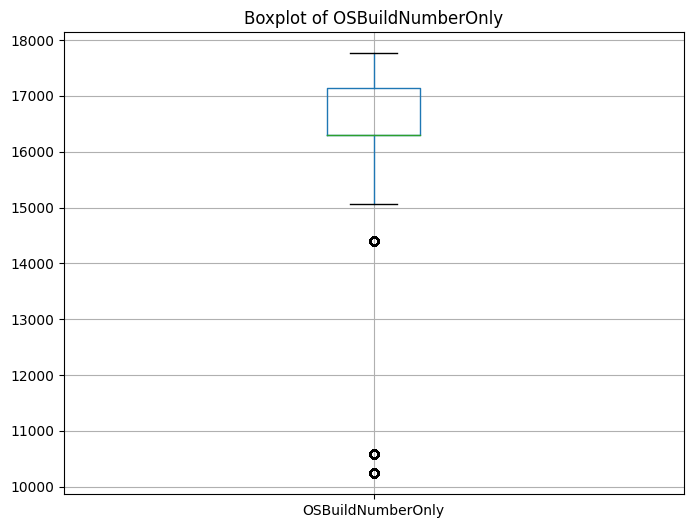

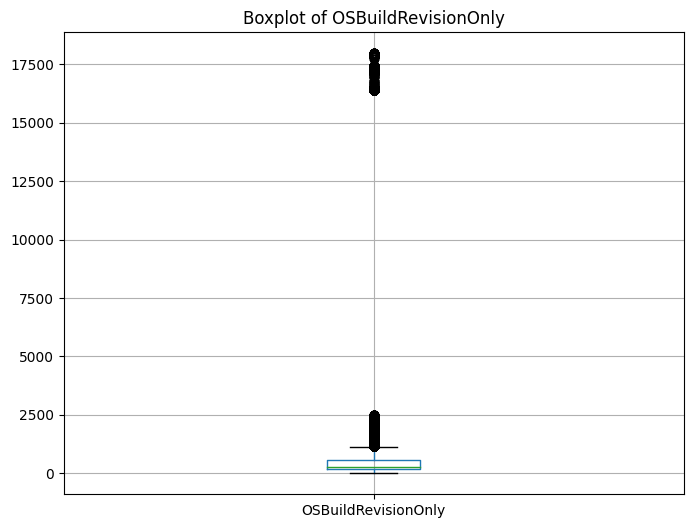

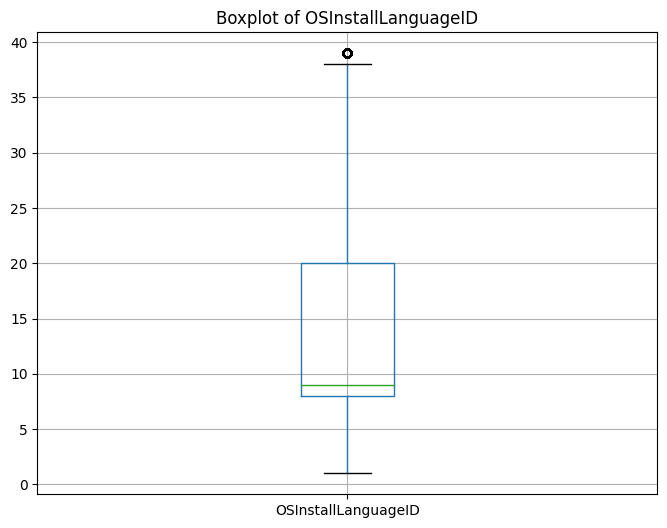

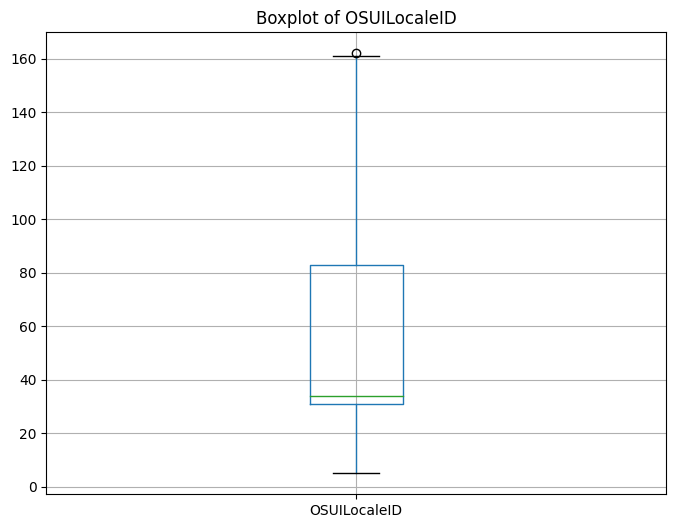

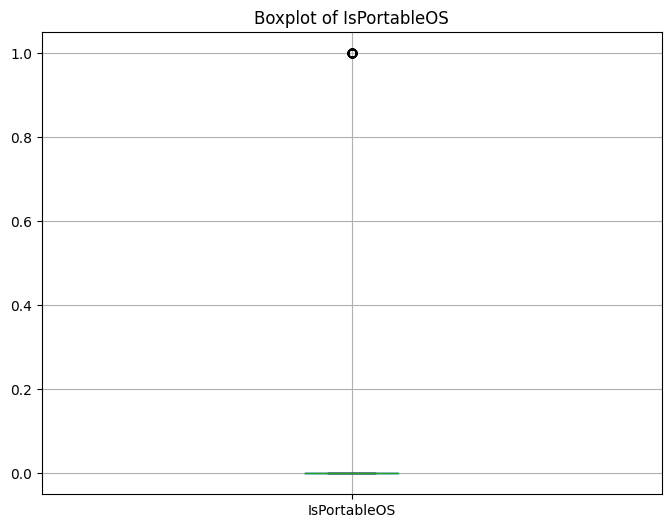

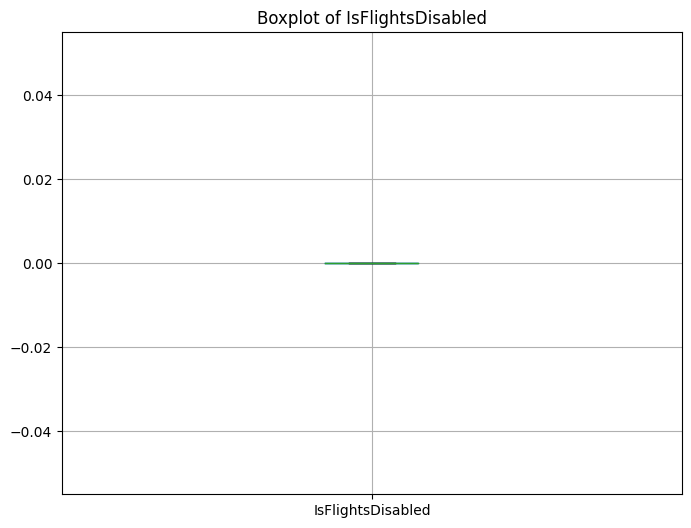

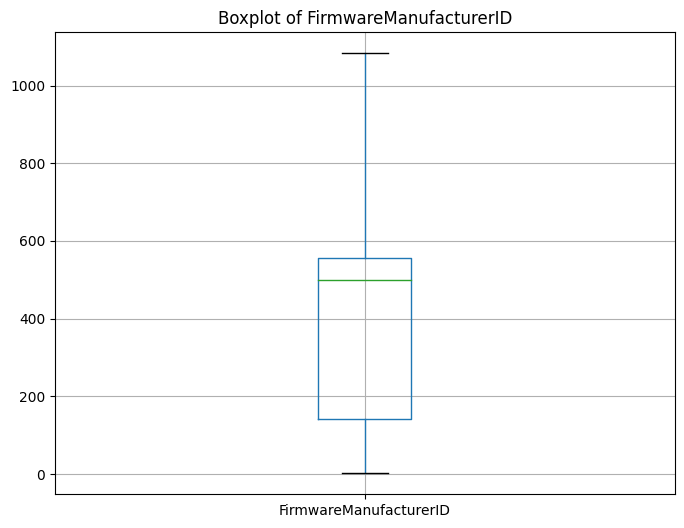

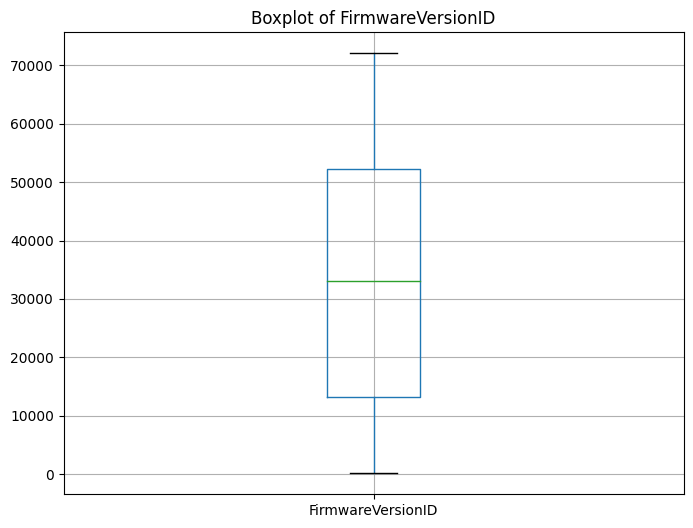

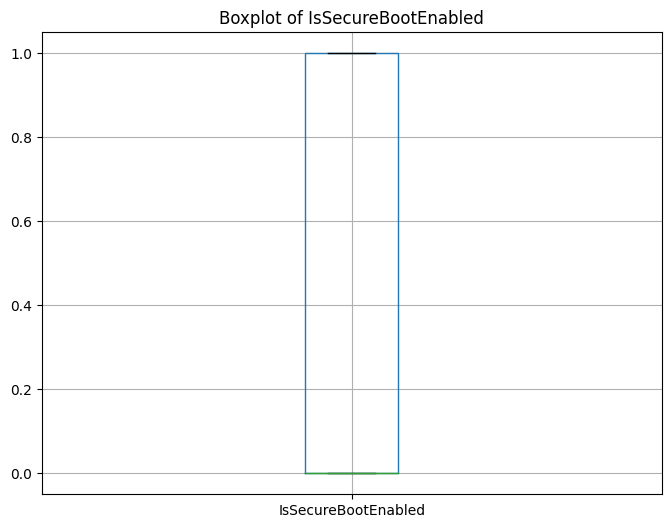

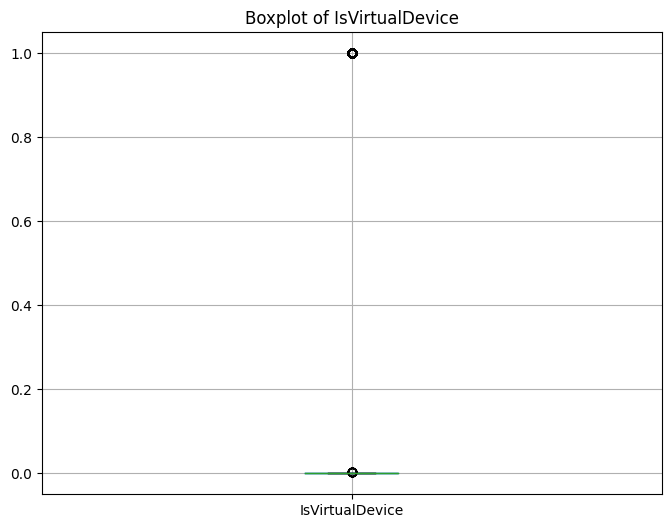

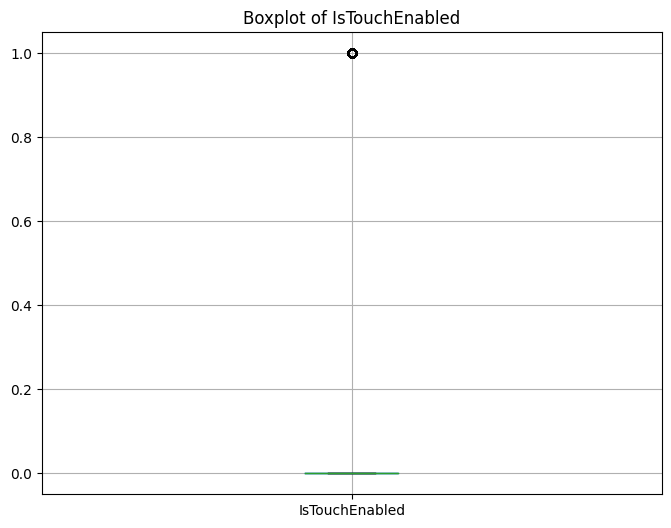

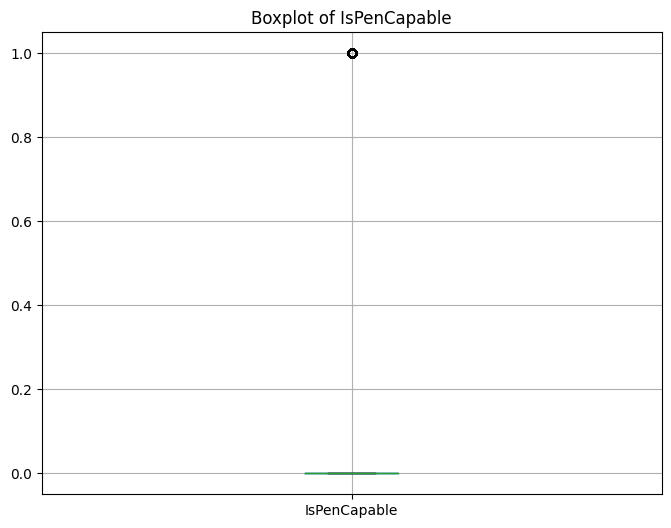

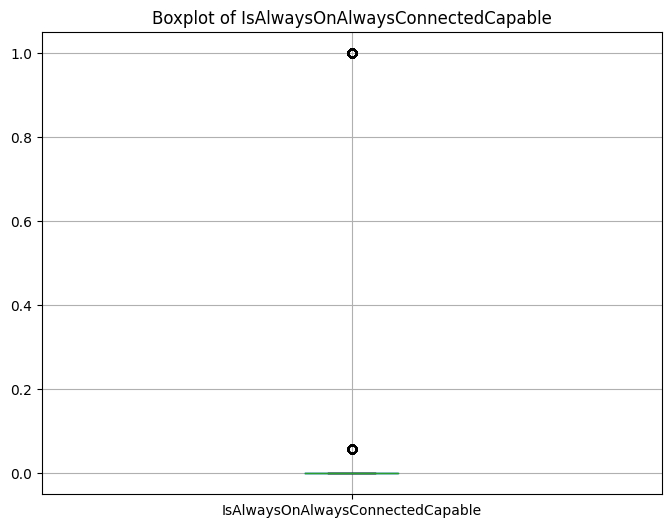

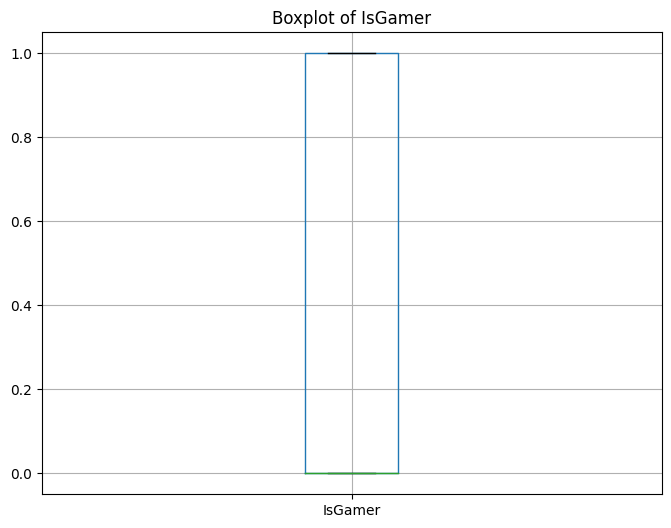

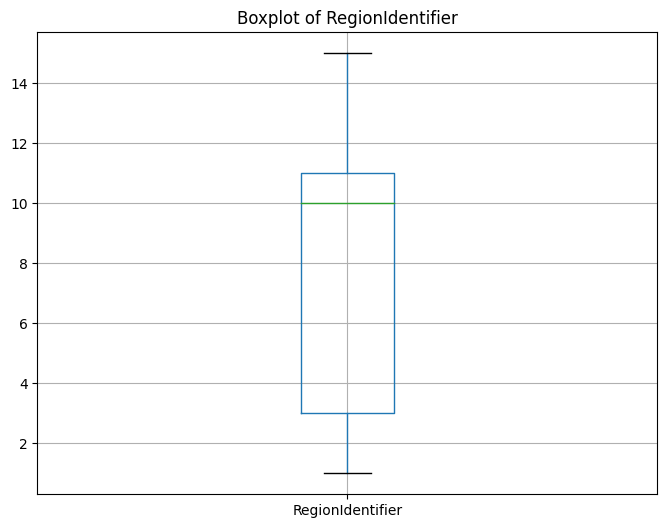

In [12]:
# make boxplot of all numerical columns

# Assuming X is your DataFrame with imputed values
for col in X.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    X.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

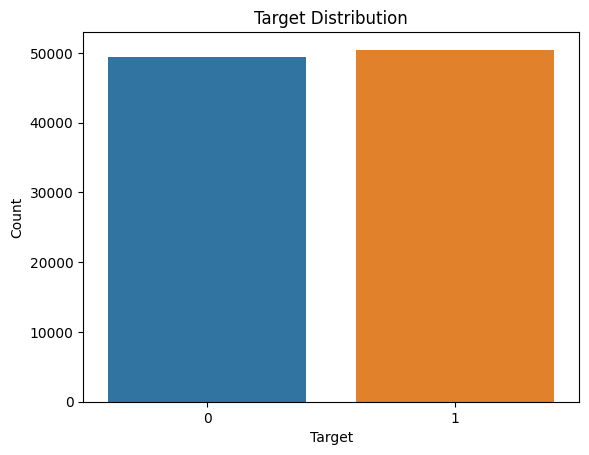

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# The target is well balanced and hence no oversampling or undersampling techniques are required. Also we can use the accuracy as a evaluation metric

In [14]:
#unique values of all the categorical columns

for col in X.select_dtypes(exclude=['number']).columns:
  print(f"Unique values for {col}:")
  print(X[col].unique())
  print("-" * 20)

Unique values for MachineID:
['f541bae429089117c4aac39c90dd3416' 'dc2b14d9ce3a0ce4050bb640190f2ca5'
 'fd20c5f010e9c5f91ad1c6b3e0da68a0' ... 'd6852dfff534e03d5ddfd3c7875ab072'
 '70a8dc682128c9ff78a3de5aea9dac74' 'ad9c385b53f2ca788933a39603b84eda']
--------------------
Unique values for ProductName:
['win8defender' 'mse']
--------------------
Unique values for EngineVersion:
['1.1.15200.1' '1.1.15100.1' '1.1.15000.2' '1.1.14800.3' '1.1.14901.4'
 '1.1.15300.6' '1.1.14700.5' '1.1.13504.0' '1.1.14104.0' '1.1.14306.0'
 '1.1.15300.5' '1.1.14600.4' '1.1.13701.0' '1.1.15000.1' '1.1.13202.0'
 '1.1.13303.0' '1.1.14500.5' '1.1.13601.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.14003.0' '1.1.14202.0' '1.1.14405.2' '1.1.13000.0' '1.1.13804.0'
 '1.1.14500.2' '1.1.14800.1' '1.1.14305.0' '1.1.14901.3' '1.1.13103.0'
 '1.1.13903.0' '1.1.12805.0' '1.1.14700.4' '1.1.12902.0' '1.1.14700.3'
 '1.1.13802.0' '1.1.13803.0']
--------------------
Unique values for AppVersion:
['4.18.1807.18075' '4.12.17007.18011' '4.13.17

In [15]:
#Summary Descriptive Statistics
X.describe()

IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count     99835.0             99835.000000          99835.000000   
mean          0.0                 6.848320              0.017639   
std           0.0                 1.015188              0.131636   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99835.000000                   99835.000000   
mean        47976.477180                       1.326457   
std         13797.166496                       0.520425   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000                       1.000000   
75%         53447.000000                       2.000000   
max         70490.000000                       5.000000   

       NumAntivirusProductsEnabled        HasTpm     CountryID         CityID  \
count                 99835.000000  99835.000000  99835.000000   99835.000000   
mean                      1.018224      0.996775    108.061211   81025.246734   
std                       0.155076      0.056701     63.063354   48790.041569   
min                       0.000000      0.000000      1.000000       7.000000   
25%                       1.000000      1.000000     51.000000   36825.000000   
50%                       1.000000      1.000000     97.000000   82373.000000   
75%                       1.000000      1.000000    162.000000  122547.000000   
max                       4.000000      1.000000    222.000000  167957.000000   

        GeoRegionID  LocaleEnglishNameID  OSBuildNumber  OSProductSuite  \
count  99835.000000         99835.000000   99835.000000    99835.000000   
mean     169.716733           122.682376   15917.315270      578.397736   
std       89.194671            69.241752    1943.267303      247.242492   
min        1.000000             1.000000    7601.000000       16.000000   
25%       89.000000            74.000000   16299.000000      256.000000   
50%      181.000000            88.000000   16299.000000      768.000000   
75%      267.000000           182.000000   17134.000000      768.000000   
max      296.000000           283.000000   17763.000000      784.000000   

       IsSystemProtected  AutoSampleSubmissionEnabled         SMode  \
count       99835.000000                      99835.0  99835.000000   
mean            0.955342                          0.0      0.000506   
std             0.206473                          0.0      0.022374   
min             0.000000                          0.0      0.000000   
25%             1.000000                          0.0      0.000000   
50%             1.000000                          0.0      0.000000   
75%             1.000000                          0.0      0.000000   
max             1.000000                          0.0      1.000000   

        IEVersionID  FirewallEnabled     EnableLUA     OEMNameID  \
count  99835.000000     99835.000000  99835.000000  99835.000000   
mean     124.053024         0.980064      0.996594   2209.821256   
std       33.507375         0.139665      0.266808   1299.462491   
min       39.000000         0.000000      0.000000     46.000000   
25%      111.000000         1.000000      1.000000   1443.000000   
50%      135.000000         1.000000      1.000000   2102.000000   
75%      137.000000         1.000000      1.000000   2668.000000   
max      429.000000         1.000000     48.000000   6062.000000   

          OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  \
count   99835.000000        99835.000000             99835.000000   
mean   238794.626542            4.011759                 4.530737

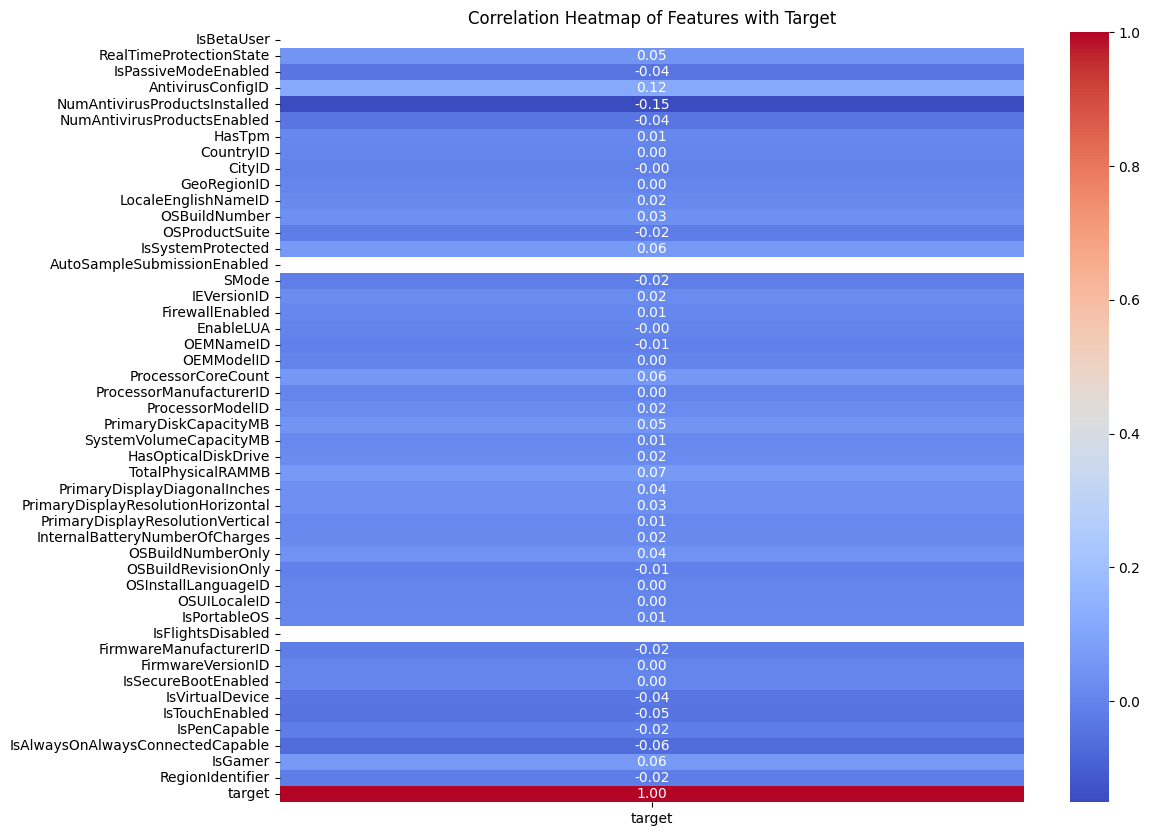


Features with significant correlation to target:


AntivirusConfigID                0.118205
NumAntivirusProductsInstalled   -0.151436
target                           1.000000
Name: target, dtype: float64

In [16]:
#correlation heatmap of the features with only the target  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'target' is your target variable column
# Filter out non-numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix[['target']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features with Target')
plt.show()
threshold = 0.1  # Adjust the threshold as needed
significant_correlations = correlation_matrix['target'][abs(correlation_matrix['target']) > threshold]
print("\nFeatures with significant correlation to target:")
significant_correlations


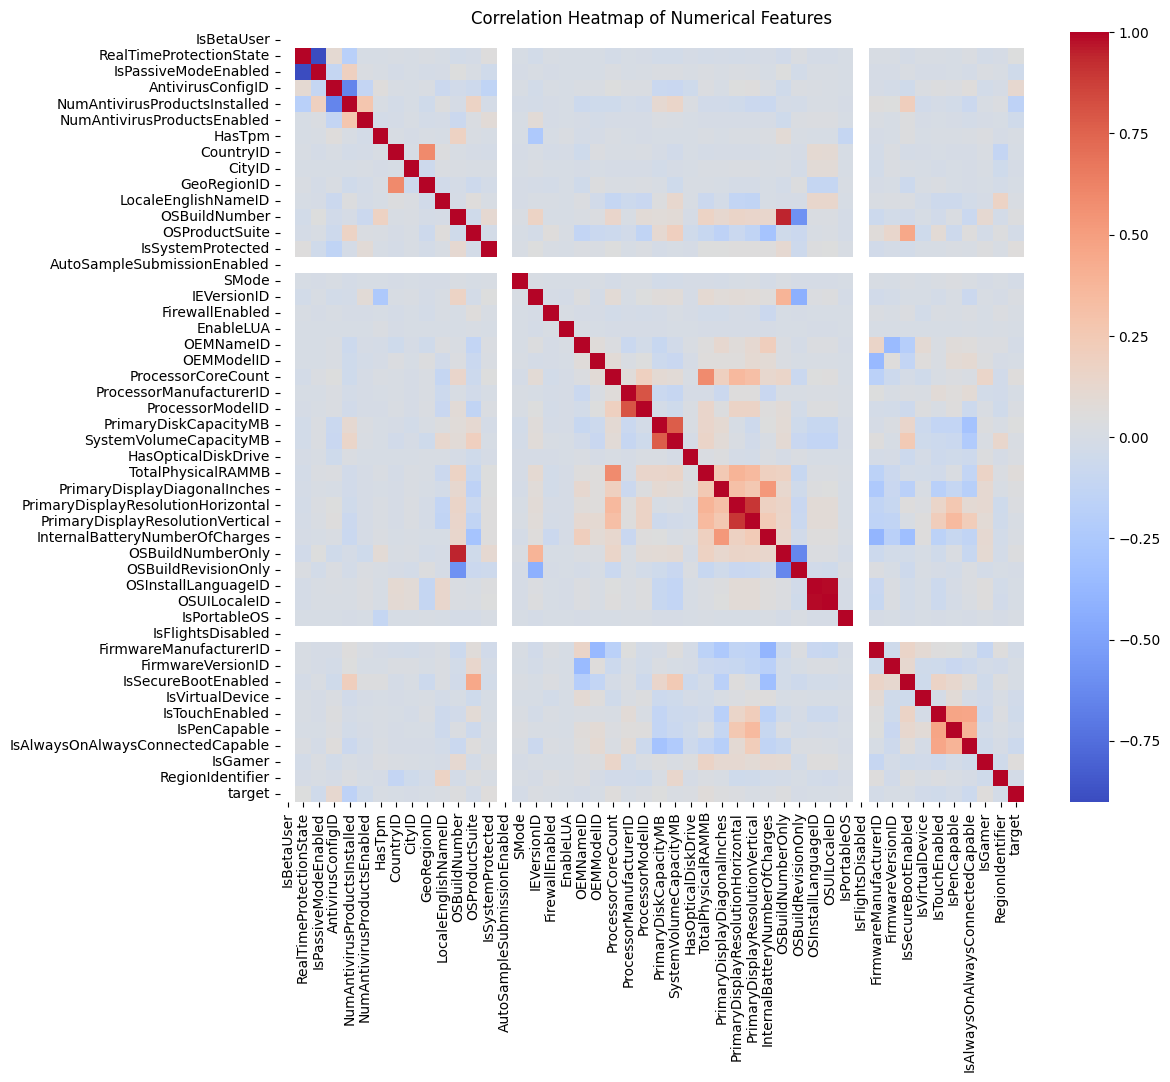

Significant Correlations:
RealTimeProtectionState and IsPassiveModeEnabled: -0.9015905155044377
AntivirusConfigID and NumAntivirusProductsInstalled: -0.6472791459896106
CountryID and GeoRegionID: 0.5970772630126387
OSBuildNumber and OSBuildNumberOnly: 0.9476128730154929
OSBuildNumber and OSBuildRevisionOnly: -0.5851834692035068
ProcessorCoreCount and TotalPhysicalRAMMB: 0.5910521400152069
ProcessorManufacturerID and ProcessorModelID: 0.8018449200098406
PrimaryDiskCapacityMB and SystemVolumeCapacityMB: 0.7710966214771665
PrimaryDisplayDiagonalInches and InternalBatteryNumberOfCharges: 0.5302202448094304
PrimaryDisplayResolutionHorizontal and PrimaryDisplayResolutionVertical: 0.8981540905355855
OSBuildNumberOnly and OSBuildRevisionOnly: -0.638380029713691
OSInstallLanguageID and OSUILocaleID: 0.98808238200902


In [17]:
#correlation heatmap between all the numerical features and print the pairs that are significantly correlated

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'target' is your target variable column
# Filter out non-numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Find and print significantly correlated pairs
threshold = 0.5  # Adjust the threshold as needed
significant_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            significant_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Significant Correlations:")
for pair in significant_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")
    

Encoding and scaling the columns and extracting relevant features from the date column

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

exclude_columns = [
    'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID',
    'LocaleEnglishNameID', 'OEMNameID', 'OEMModelID', 'ProcessorManufacturerID',
    'ProcessorModelID', 'RegionIdentifier', 'DateAS', 'DateOS', 'target', 'NumericOSVersion', 'OSBuildNumberOnly',
    'OSBuildRevisionOnly'
]

label_encode_columns = [
    'RealTimeProtectionState', 'IsPassiveModeEnabled', 'HasTpm',
    'IsSystemProtected', 'SMode', 'FirewallEnabled',
    'EnableLUA', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
    'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',  'EngineVersion', 'AppVersion', 'SignatureVersion', 'MachineID', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'MDC2FormFactor',
    'NumericOSVersion', 'OSArchitecture', 'OSBranch',"HasOpticalDiskDrive",'ChassisType',"IsPortableOS"
]

one_hot_encode_columns = [
    'ProductName', 'PlatformType', 'Processor', 'SKUEditionName', 'DeviceFamily',
     'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'LicenseActivationChannel', 'FlightRing',
    'PrimaryDiskType', 'PowerPlatformRole','OSGenuineState'
]

scale_columns = [
    'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB',
    'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches',
    'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
    'InternalBatteryNumberOfCharges',
]

X_transformed = X.copy()

# Perform Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_columns:
    X_transformed[col] = label_encoder.fit_transform(X_transformed[col])
print("After label encoding:", X_transformed.shape)

# Check unique values in one-hot encode columns
for col in one_hot_encode_columns:
    print(f"Column: {col}, Unique values: {X_transformed[col].unique()}")

# Perform One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(X_transformed[one_hot_encode_columns])
print("One-hot encoded shape:", one_hot_encoded.shape)

# Create a DataFrame from the one-hot encoded array
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))
print("One-hot encoded DataFrame shape:", one_hot_encoded_df.shape)

# Drop the original one-hot encode columns and concatenate the new one-hot encoded DataFrame
X_transformed = X_transformed.drop(columns=one_hot_encode_columns)
print("After dropping one-hot columns:", X_transformed.shape)

# Reset indices to ensure alignment
X_transformed = X_transformed.reset_index(drop=True)
one_hot_encoded_df = one_hot_encoded_df.reset_index(drop=True)
X_transformed = pd.concat([X_transformed, one_hot_encoded_df], axis=1)
print("After concatenation:", X_transformed.shape)

# Perform Standard Scaling
scaler = StandardScaler()
X_transformed[scale_columns] = scaler.fit_transform(X_transformed[scale_columns])
print("After scaling:", X_transformed.shape)

X_transformed['DateAS'] = pd.to_datetime(X_transformed['DateAS'])
X_transformed['DateOS'] = pd.to_datetime(X_transformed['DateOS'])

# Extract features from DateAS
X_transformed['DateAS_day'] = X_transformed['DateAS'].dt.day
X_transformed['DateAS_month'] = X_transformed['DateAS'].dt.month
X_transformed['DateAS_year'] = X_transformed['DateAS'].dt.year
X_transformed['DateAS_weekday'] = X_transformed['DateAS'].dt.weekday  # Monday=0, Sunday=6

# Extract features from DateOS
X_transformed['DateOS_day'] = X_transformed['DateOS'].dt.day
X_transformed['DateOS_month'] = X_transformed['DateOS'].dt.month
X_transformed['DateOS_year'] = X_transformed['DateOS'].dt.year
X_transformed['DateOS_weekday'] = X_transformed['DateOS'].dt.weekday  # Monday=0, Sunday=6

# Drop the original DateAS and DateOS columns
X_transformed = X_transformed.drop(columns=['DateAS', 'DateOS'])
X_transformed.shape

After label encoding: (99835, 75)
Column: ProductName, Unique values: ['win8defender' 'mse']
Column: PlatformType, Unique values: ['windows10' 'windows8' 'windows7' 'windows2016']
Column: Processor, Unique values: ['x86' 'x64' 'arm64']
Column: SKUEditionName, Unique values: ['Home' 'Pro' 'Cloud' 'Education' 'Enterprise LTSB' 'Enterprise' 'Invalid'
 'Server']
Column: DeviceFamily, Unique values: ['Windows.Desktop' 'Windows.Server']
Column: OSEdition, Unique values: ['Core' 'Professional' 'CoreSingleLanguage' 'ProfessionalN'
 'ProfessionalEducation' 'CoreCountrySpecific' 'Cloud' 'Education'
 'EnterpriseS' 'Enterprise' 'EnterpriseSN' 'CoreN' 'EducationN'
 'ServerStandard' 'ProfessionalEducationN' 'ServerStandardEval'
 'EnterpriseN' 'ServerSolution' 'ServerDatacenterEval'
 'ProfessionalWorkstation']
Column: OSSkuFriendlyName, Unique values: ['CORE' 'PROFESSIONAL' 'CORE_SINGLELANGUAGE' 'PROFESSIONAL_N'
 'CORE_COUNTRYSPECIFIC' 'CLOUD' 'EDUCATION' 'ENTERPRISE_S' 'ENTERPRISE'
 'ENTERPRISE_S_N'

(99835, 155)

# Fitting models

Training Decision Tree...

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54      9852
           1       0.55      0.54      0.55     10115

    accuracy                           0.54     19967
   macro avg       0.54      0.54      0.54     19967
weighted avg       0.54      0.54      0.54     19967


Confusion Matrix for Decision Tree:


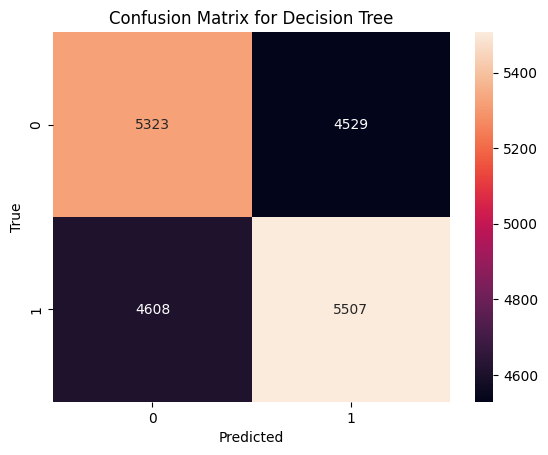

Decision Tree Accuracy: 0.542394951670256
Training Random Forest...

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      9852
           1       0.62      0.63      0.62     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.62      0.62     19967
weighted avg       0.62      0.62      0.62     19967


Confusion Matrix for Random Forest:


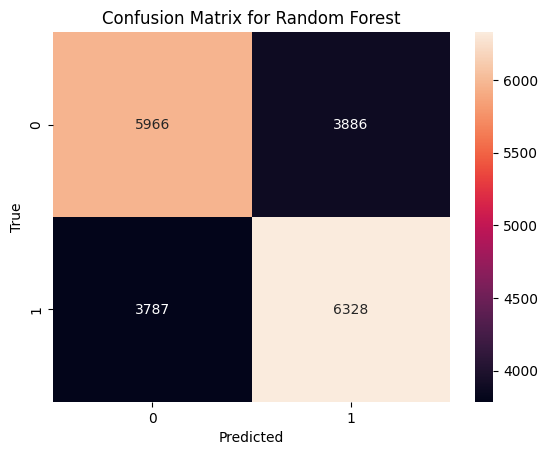

Random Forest Accuracy: 0.6157159312866229
Training Logistic Regression...

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.58      0.37      0.45      9852
           1       0.55      0.74      0.63     10115

    accuracy                           0.56     19967
   macro avg       0.56      0.55      0.54     19967
weighted avg       0.56      0.56      0.54     19967


Confusion Matrix for Logistic Regression:


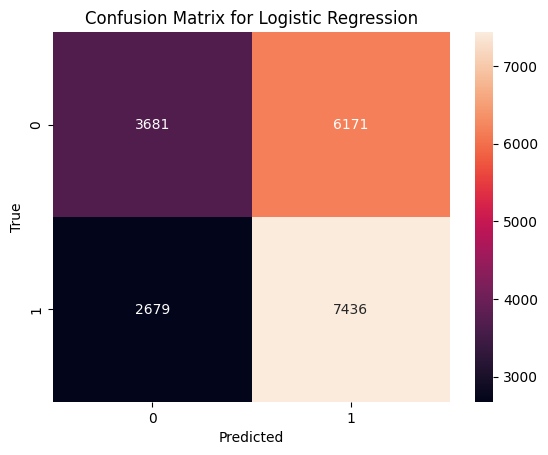

Logistic Regression Accuracy: 0.5567686683026994
Training XGBoost...

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60      9852
           1       0.62      0.65      0.63     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.62      0.62     19967
weighted avg       0.62      0.62      0.62     19967


Confusion Matrix for XGBoost:


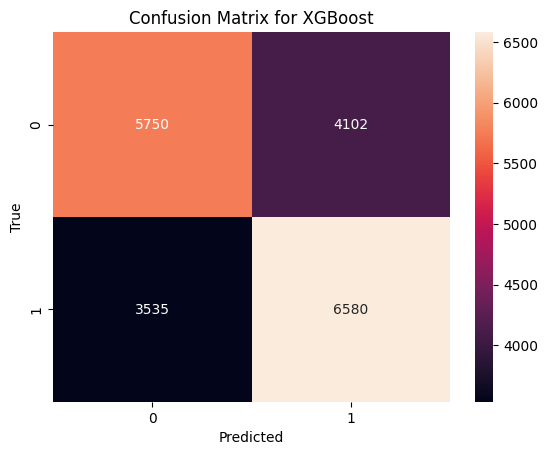

XGBoost Accuracy: 0.6175189061952221
Training LightGBM...
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4882
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 132
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      9852
           1       0.62      0.66      0.64     10115

    accuracy                           0.63     19967
   macro avg       0.63      0.62      0.62     19967
weighted avg       0.63      0.63      0.62     19967


Confusion Matrix fo

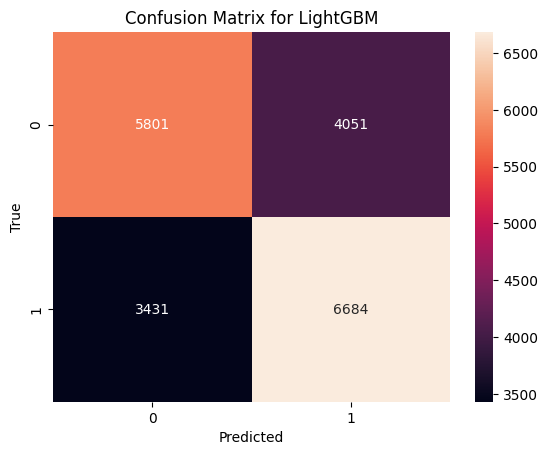

LightGBM Accuracy: 0.6252817148294686


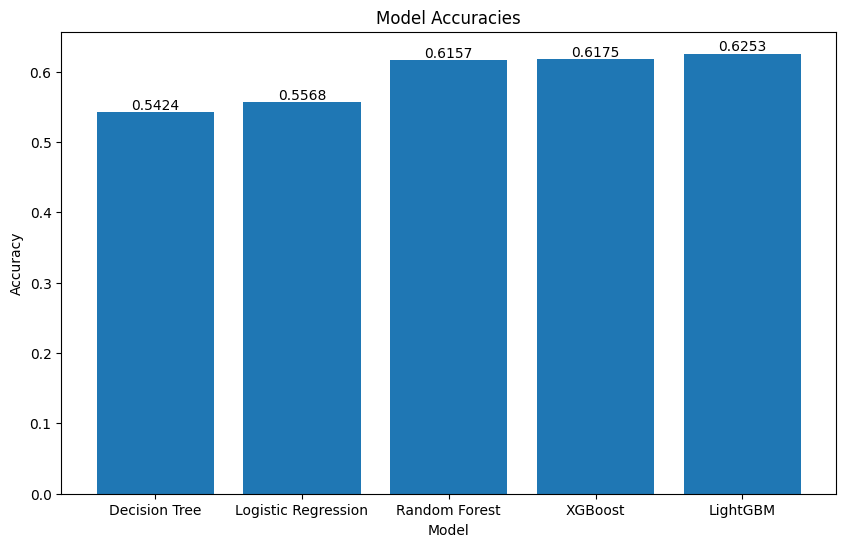

In [19]:
# fit Decision tree , Random forest , Logistic regresson , xgboost , lightgbm  and other classification models to the dataset and give confusion matrix , classification report and plot the model accuracies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Initialize classifiers
classifiers = {

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

model_accuracies = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracy = clf.score(X_test, y_test)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


# Plot model accuracies
plt.figure(figsize=(10, 6))
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1])
plt.bar([x[0] for x in sorted_accuracies], [x[1] for x in sorted_accuracies])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
for i, (model, accuracy) in enumerate(sorted_accuracies):
    plt.text(i, accuracy, f"{accuracy:.4f}", ha='center', va='bottom')
plt.show()


# Feature extraction/engineering

In [20]:
print(X["NumericOSVersion"].value_counts())

NumericOSVersion
10.0.17134.228      17042
10.0.17134.165      11195
10.0.16299.431       6616
10.0.17134.285       5247
10.0.16299.547       4218
10.0.16299.371       4076
10.0.17134.112       3867
10.0.17134.191       2696
10.0.16299.611       2585
10.0.14393.2189      2560
10.0.16299.125       2515
10.0.10240.17443     2440
10.0.10586.1176      2033
10.0.16299.492       1994
10.0.16299.309       1812
10.0.15063.1206      1230
10.0.17134.286       1189
10.0.17134.254       1170
10.0.16299.192       1149
10.0.15063.1266      1143
10.0.16299.15        1094
10.0.17134.167       1063
10.0.17134.137        943
10.0.17134.1          919
10.0.16299.248        869
10.0.17134.48         749
10.0.15063.1088       731
10.0.17134.81         619
10.0.15063.0          593
10.0.15063.1155       549
10.0.14393.693        494
10.0.15063.786        434
10.0.14393.2214       410
10.0.16299.665        409
10.0.15063.726        358
10.0.15063.850        348
10.0.15063.674        340
10.0.15063.1324      

In [21]:
print(X["EngineVersion"].value_counts())


EngineVersion
1.1.15200.1    45147
1.1.15100.1    43946
1.1.15000.2     3163
1.1.14901.4     2594
1.1.14800.3     1711
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      252
1.1.13504.0      212
1.1.14500.5      123
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.13804.0       33
1.1.13903.0       28
1.1.13303.0       27
1.1.13601.0       26
1.1.13407.0       23
1.1.14901.3       22
1.1.15000.1       21
1.1.13103.0       20
1.1.14305.0       17
1.1.14700.4       16
1.1.12902.0       15
1.1.13704.0       15
1.1.13701.0       15
1.1.13202.0       14
1.1.13000.0       10
1.1.14700.3        9
1.1.14800.1        7
1.1.14500.2        3
1.1.12805.0        2
1.1.13802.0        1
1.1.13803.0        1
Name: count, dtype: int64


In [22]:
print(X["AppVersion"].value_counts())


AppVersion
4.18.1807.18075     62018
4.18.1806.18062     10458
4.12.16299.15        3229
4.16.17656.18052     2940
4.14.17639.18041     2481
4.8.10240.17443      2417
4.9.10586.1106       2272
4.13.17134.1         2136
4.13.17134.228       2118
4.10.209.0           1586
4.12.17007.18022     1266
4.9.10586.0           720
4.11.15063.447        642
4.14.17613.18039      628
4.12.17007.18011      555
4.11.15063.0          517
4.10.14393.0          494
4.8.10240.16384       452
4.10.14393.1794       356
4.11.15063.1155       328
4.9.10586.672         232
4.13.17134.191        222
4.10.14393.1198       183
4.9.10586.494         156
4.12.17007.17123      121
4.13.17134.112        116
4.10.14393.1613       113
4.9.10586.1045        112
4.9.10586.589         112
4.18.1809.2            83
4.10.14393.1593        75
4.8.10240.17946        71
4.9.10586.916          60
4.10.14393.953         59
4.10.14393.1066        56
4.9.10586.962          55
4.9.10586.873          53
4.9.10586.965          50
4

In [23]:
print(X["SignatureVersion"].value_counts())


SignatureVersion
1.273.1420.0    1273
1.275.1140.0    1142
1.273.371.0     1068
1.275.727.0     1041
1.273.1826.0     996
1.275.1244.0     920
1.273.810.0      783
1.275.1209.0     778
1.273.1749.0     757
1.273.1005.0     605
1.273.894.0      563
1.273.1379.0     561
1.273.781.0      528
1.273.1527.0     514
1.273.1167.0     483
1.273.337.0      477
1.273.461.0      476
1.273.717.0      449
1.275.1293.0     432
1.273.950.0      429
1.275.948.0      406
1.263.48.0       392
1.273.1034.0     384
1.275.1025.0     384
1.273.1112.0     381
1.273.665.0      380
1.273.1056.0     368
1.275.112.0      365
1.273.1311.0     365
1.275.1011.0     355
1.275.1487.0     353
1.273.933.0      352
1.273.1668.0     352
1.275.263.0      351
1.275.511.0      349
1.273.1795.0     347
1.275.974.0      340
1.275.981.0      338
1.275.1669.0     334
1.273.1574.0     328
1.273.1282.0     328
1.275.1086.0     328
1.275.1458.0     327
1.273.1073.0     313
1.273.836.0      309
1.273.869.0      297
1.273.443.0      

In [24]:
import pandas as pd

def split_and_prefix_osbuildlab(df):
    # Split the 'OSBuildLab' column into multiple columns
    split_columns = df['OSBuildLab'].str.split('.', expand=True)
    
    # Add the 'extracted_' prefix to the new columns
    split_columns = split_columns.add_prefix('extracted_')
    
    # Concatenate the new columns with the original DataFrame
    df = pd.concat([df, split_columns], axis=1)
    
    return df


X_transformed1 = split_and_prefix_osbuildlab(X)


In [25]:
X_transformed1.head()

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0         0.0                      7.0   
1   4.18.1807.18075     1.273.1465.0         0.0                      7.0   
2   4.18.1807.18075     1.275.1546.0         0.0                      7.0   
3  4.12.17007.18011     1.275.1141.0         0.0                      7.0   
4    4.13.17134.228     1.275.1283.0         0.0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                   0.0            53447.0                            1.0   
1                   0.0            53447.0                            1.0   
2                   0.0            53447.0                            1.0   
3                   0.0            46413.0                            2.0   
4                   0.0            40466.0                            2.0   

   NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                          1.0     1.0       51.0  120232.0         98.0   
1                          1.0     1.0      141.0  112854.0        167.0   
2                          1.0     1.0       51.0   41759.0         98.0   
3                          1.0     1.0       68.0   19507.0        276.0   
4                          1.0     1.0       43.0  117801.0         53.0   

   LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                103.0    windows10       x86  10.0.0.0        14393.0   
1                227.0    windows10       x64  10.0.0.0        17134.0   
2                103.0    windows10       x64  10.0.0.0        17134.0   
3                 74.0    windows10       x64  10.0.0.0        15063.0   
4                 42.0    windows10       x86  10.0.0.0        17134.0   

   OSProductSuite OsPlatformSubRelease  \
0           768.0                  rs1   
1           256.0                  rs4   
2           768.0                  rs4   
3           768.0                  rs2   
4           256.0                  rs4   

                                    OSBuildLab SKUEditionName  \
0  14393.2214.x86fre.rs1_release_1.180402-1758           Home   
1     17134.1.amd64fre.rs4_release.180410-1804            Pro   
2     17134.1.amd64fre.rs4_release.180410-1804           Home   
3     15063.0.amd64fre.rs2_release.170317-1834           Home   
4       17134.1.x86fre.rs4_release.180410-1804            Pro   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0                1.0                          0.0    0.0         98.0   
1                1.0                          0.0    0.0        137.0   
2                1.0                          0.0    0.0        137.0   
3                1.0                          0.0    0.0        108.0   
4                1.0                          0.0    0.0        137.0   

   FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
0              1.0        1.0    SmallTablet  Windows.Desktop      561.0   
1              1.0        1.0       AllInOne  Windows.Desktop     2668.0   
2              1.0        1.0        Desktop  Windows.Desktop     3035.0   
3              1.0        1.0       Notebook  Windows.Desktop     2102.0   
4              1.0        1.0        Desktop  Windows.Desktop     2668.0   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0    330367.0                 4.0                      5.0            1850.0   
1     25212.0                 4.0                      5.0            2407.0   
2    263666.0  

Extract different components from each of the versions

In [26]:
import pandas as pd

# Function to extract components from version strings
def extract_version_components(version, prefix):
    try:
        parts = version.split('.')
        return {
            f'{prefix}_MajorVersion': int(parts[0]),
            f'{prefix}_MinorVersion': int(parts[1]),
            f'{prefix}_BuildNumber': int(parts[2]),
            f'{prefix}_Revision': int(parts[3])
        }
    except (IndexError, ValueError):
        # Handle invalid version strings
        return {
            f'{prefix}_MajorVersion': None,
            f'{prefix}_MinorVersion': None,
            f'{prefix}_BuildNumber': None,
            f'{prefix}_Revision': None
        }

# Apply feature extraction to each version column
def extract_features_from_versions(df):
    # Extract features for EngineVersion
    engine_features = df['EngineVersion'].apply(extract_version_components, prefix='extracted_Engine').apply(pd.Series)
    df = pd.concat([df, engine_features], axis=1)

    # Extract features for AppVersion
    app_features = df['AppVersion'].apply(extract_version_components, prefix='extracted_App').apply(pd.Series)
    df = pd.concat([df, app_features], axis=1)

    # Extract features for SignatureVersion
    signature_features = df['SignatureVersion'].apply(extract_version_components, prefix='extracted_Signature').apply(pd.Series)
    df = pd.concat([df, signature_features], axis=1)

    return df

X_transformed1 = extract_features_from_versions(X_transformed1)

In [27]:
print(X_transformed1.isna().sum())

MachineID                             0
ProductName                           0
EngineVersion                         0
AppVersion                            0
SignatureVersion                      0
IsBetaUser                            0
RealTimeProtectionState               0
IsPassiveModeEnabled                  0
AntivirusConfigID                     0
NumAntivirusProductsInstalled         0
NumAntivirusProductsEnabled           0
HasTpm                                0
CountryID                             0
CityID                                0
GeoRegionID                           0
LocaleEnglishNameID                   0
PlatformType                          0
Processor                             0
OSVersion                             0
OSBuildNumber                         0
OSProductSuite                        0
OsPlatformSubRelease                  0
OSBuildLab                            0
SKUEditionName                        0
IsSystemProtected                     0


In [28]:
X_transformed1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99835 entries, 0 to 99999
Data columns (total 92 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           99835 non-null  object 
 1   ProductName                         99835 non-null  object 
 2   EngineVersion                       99835 non-null  object 
 3   AppVersion                          99835 non-null  object 
 4   SignatureVersion                    99835 non-null  object 
 5   IsBetaUser                          99835 non-null  float64
 6   RealTimeProtectionState             99835 non-null  float64
 7   IsPassiveModeEnabled                99835 non-null  float64
 8   AntivirusConfigID                   99835 non-null  float64
 9   NumAntivirusProductsInstalled       99835 non-null  float64
 10  NumAntivirusProductsEnabled         99835 non-null  float64
 11  HasTpm                              99835 non-

In [29]:
#number of unique values in all the columns and print the columns which have only one unique value (constant variance)

import pandas as pd

unique_counts = X_transformed1.nunique()
print("Number of unique values in each column:\n", unique_counts)

single_unique_value_columns = unique_counts[unique_counts == 1].index.tolist()
print("\nColumns with only one unique value:", single_unique_value_columns)


Number of unique values in each column:
 MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
IsBetaUser                                1
RealTimeProtectionState                   7
IsPassiveModeEnabled                      2
AntivirusConfigID                      1977
NumAntivirusProductsInstalled             6
NumAntivirusProductsEnabled               6
HasTpm                                    2
CountryID                               220
CityID                                16048
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease               

In [30]:

X_transformed2 = X_transformed1.drop(columns=single_unique_value_columns, errors='ignore')

# Print the updated number of unique values in each column after dropping
unique_counts = X_transformed2.nunique()
print("Number of unique values in each column after dropping:\n", unique_counts)

single_unique_value_columns = unique_counts[unique_counts == 1].index.tolist()
print("\nColumns with only one unique value after dropping:", single_unique_value_columns)


Number of unique values in each column after dropping:
 MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
RealTimeProtectionState                   7
IsPassiveModeEnabled                      2
AntivirusConfigID                      1977
NumAntivirusProductsInstalled             6
NumAntivirusProductsEnabled               6
HasTpm                                    2
CountryID                               220
CityID                                16048
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease                      9
OSBuildLab          

In [31]:
X_transformed2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99835 entries, 0 to 99999
Data columns (total 84 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           99835 non-null  object 
 1   ProductName                         99835 non-null  object 
 2   EngineVersion                       99835 non-null  object 
 3   AppVersion                          99835 non-null  object 
 4   SignatureVersion                    99835 non-null  object 
 5   RealTimeProtectionState             99835 non-null  float64
 6   IsPassiveModeEnabled                99835 non-null  float64
 7   AntivirusConfigID                   99835 non-null  float64
 8   NumAntivirusProductsInstalled       99835 non-null  float64
 9   NumAntivirusProductsEnabled         99835 non-null  float64
 10  HasTpm                              99835 non-null  float64
 11  CountryID                           99835 non-

In [32]:
X_transformed2["extracted_0"].value_counts()

extracted_0
17134    45764
16299    29579
15063     8365
14393     7366
10586     3865
10240     3100
9600      1397
7601       226
17744       26
17692       26
17738       20
17758       14
17735       14
17741       14
17746       14
17713       11
17755        7
17763        6
17751        6
17760        5
17672        4
17754        3
17730        2
17686        1
Name: count, dtype: int64

In [33]:
X_transformed2["extracted_1"].value_counts()

extracted_1
1        45805
431      15129
15       13851
0         8781
2189      2672
17443     2417
1176      2073
637        523
19067      440
19101      424
2214       418
693        401
16384      272
1593       266
2007       265
1944       260
672        232
1770       209
447        202
162        201
1106       198
2068       195
1358       193
1794       189
1715       188
1198       185
1480       177
953        173
1066       168
2125       155
351        146
19125      134
19035      123
103        120
1045       112
839         96
576         95
187         84
545         83
212         83
1000        79
402         76
19000       74
16393       74
494         73
420         72
18821       67
24168       67
24214       66
17          65
633         62
916         60
17946       59
1914        58
962         55
589         50
1007        50
306         47
2430        47
16463       39
122         37
321         36
63          30
2248        28
1001        26
1004        2

In [34]:
X_transformed2["extracted_2"].value_counts()

extracted_2
amd64fre    91110
x86fre       8720
arm64fre        5
Name: count, dtype: int64

In [35]:
X_transformed2["extracted_3"].value_counts()

extracted_3
rs4_release                  45764
rs3_release_svc_escrow       15129
rs3_release                  13851
rs2_release                   8365
rs1_release                   5469
th1                           2923
th2_release_sec               2855
rs1_release_inmarket          1043
winblue_ltsb_escrow           1012
th2_release                    973
rs3_release_svc                523
rs1_release_1                  448
winblue_ltsb                   378
rs1_release_sec                353
th1_st1                        170
rs5_release                    142
win7sp1_ldr                    122
win7sp1_ldr_escrow             100
rs3_release_svc_escrow_im       76
rs1_release_inmarket_aim        53
th2_release_inmarket            37
rs_prerelease_flt               26
th1_escrow                       7
rs_prerelease                    5
win7sp1_gdr                      4
winblue_r9                       2
winblue_gdr                      2
winblue_r4                       2
winblue_

In [36]:
X_transformed2["extracted_4"].value_counts()

extracted_4
180410-1804    45764
180502-1908    15129
170928-1534    13851
170317-1834     8365
180329-1711     2672
170602-2340     2417
170913-1848     2073
180808-1748      523
180619-2033      440
180718-1800      424
180402-1758      418
161220-1747      401
160715-1616      347
150709-1700      272
170731-1934      266
171231-1800      265
171129-2100      260
161024-1825      232
170917-1700      209
161102-0100      202
160223-1728      201
170904-1742      198
180209-1727      195
170602-2252      193
171008-1615      189
170906-1810      188
170427-1353      185
170706-2004      177
170303-1614      173
170327-1835      168
180301-2139      155
161014-1755      146
180812-0703      134
180522-1700      123
170728-1941      112
160126-1819       99
170303-1605       96
161208-2252       95
160906-1818       84
160328-1908       83
160802-1857       83
180415-0955       76
180410-0600       74
150717-1719       74
160630-1736       73
160527-1834       72
151029-1700       69
1

In [37]:
X_transformed2['extracted_0'] = X_transformed2['extracted_0'].astype(int)


In [38]:
X_transformed2['extracted_1'] = X_transformed2['extracted_1'].astype(int)

In [39]:

X_transformed2['DateAS'] = pd.to_datetime(X_transformed2['DateAS'])
X_transformed2['DateOS'] = pd.to_datetime(X_transformed2['DateOS'])

# Extract features from DateAS
X_transformed2['DateAS_day'] = X_transformed2['DateAS'].dt.day
X_transformed2['DateAS_month'] = X_transformed2['DateAS'].dt.month
X_transformed2['DateAS_year'] = X_transformed2['DateAS'].dt.year
X_transformed2['DateAS_weekday'] = X_transformed2['DateAS'].dt.weekday  # Monday=0, Sunday=6

# Extract features from DateOS
X_transformed2['DateOS_day'] = X_transformed2['DateOS'].dt.day
X_transformed2['DateOS_month'] = X_transformed2['DateOS'].dt.month
X_transformed2['DateOS_year'] = X_transformed2['DateOS'].dt.year
X_transformed2['DateOS_weekday'] = X_transformed2['DateOS'].dt.weekday  # Monday=0, Sunday=6

# Drop the original DateAS and DateOS columns
X_transformed2 = X_transformed2.drop(columns=['DateAS', 'DateOS'])


exclude_columns = [
    'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID',
    'LocaleEnglishNameID', 'OEMNameID', 'OEMModelID', 'ProcessorManufacturerID',
    'ProcessorModelID', 'RegionIdentifier', 'DateAS', 'DateOS', 'target', 'NumericOSVersion', 'OSBuildNumberOnly',
    'OSBuildRevisionOnly'
]

label_encode_columns = [
    'RealTimeProtectionState', 'IsPassiveModeEnabled', 'HasTpm',
    'IsSystemProtected', 'SMode', 'FirewallEnabled',
    'EnableLUA', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
    'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',  'EngineVersion', 'AppVersion', 'SignatureVersion', 'MachineID', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'MDC2FormFactor',
    'NumericOSVersion', 'OSArchitecture', 'OSBranch',"HasOpticalDiskDrive",'ChassisType',"IsPortableOS","extracted_4","extracted_3"
]

one_hot_encode_columns = [
    'ProductName', 'PlatformType', 'Processor', 'SKUEditionName', 'DeviceFamily',
     'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'LicenseActivationChannel', 'FlightRing',
    'PrimaryDiskType', 'PowerPlatformRole','OSGenuineState',"extracted_2"
]

scale_columns = [
    'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB',
    'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches',
    'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
    'InternalBatteryNumberOfCharges',
]
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Columns to exclude, label encode, one-hot encode, and scale

# Columns to exclude

print("Original shape:", X.shape)
X_transformed3 = X_transformed2.copy()
# Perform Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_columns:
    X_transformed3[col] = label_encoder.fit_transform(X_transformed3[col])
print("After label encoding:", X_transformed3.shape)

# Check unique values in one-hot encode columns
for col in one_hot_encode_columns:
    print(f"Column: {col}, Unique values: {X_transformed3[col].unique()}")

# Perform One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(X_transformed3[one_hot_encode_columns])
print("One-hot encoded shape:", one_hot_encoded.shape)

# Create a DataFrame from the one-hot encoded array
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))
print("One-hot encoded DataFrame shape:", one_hot_encoded_df.shape)

# Drop the original one-hot encode columns and concatenate the new one-hot encoded DataFrame
X_transformed3 = X_transformed3.drop(columns=one_hot_encode_columns)
print("After dropping one-hot columns:", X_transformed3.shape)

# Reset indices to ensure alignment
X_transformed3 = X_transformed3.reset_index(drop=True)
one_hot_encoded_df = one_hot_encoded_df.reset_index(drop=True)
X_transformed3 = pd.concat([X_transformed3, one_hot_encoded_df], axis=1)
print("After concatenation:", X_transformed3.shape)

# Perform Standard Scaling
scaler = StandardScaler()
X_transformed3[scale_columns] = scaler.fit_transform(X_transformed3[scale_columns])
print("After scaling:", X_transformed3.shape)

Original shape: (99835, 75)
After label encoding: (99835, 90)
Column: ProductName, Unique values: ['win8defender' 'mse']
Column: PlatformType, Unique values: ['windows10' 'windows8' 'windows7' 'windows2016']
Column: Processor, Unique values: ['x86' 'x64' 'arm64']
Column: SKUEditionName, Unique values: ['Home' 'Pro' 'Cloud' 'Education' 'Enterprise LTSB' 'Enterprise' 'Invalid'
 'Server']
Column: DeviceFamily, Unique values: ['Windows.Desktop' 'Windows.Server']
Column: OSEdition, Unique values: ['Core' 'Professional' 'CoreSingleLanguage' 'ProfessionalN'
 'ProfessionalEducation' 'CoreCountrySpecific' 'Cloud' 'Education'
 'EnterpriseS' 'Enterprise' 'EnterpriseSN' 'CoreN' 'EducationN'
 'ServerStandard' 'ProfessionalEducationN' 'ServerStandardEval'
 'EnterpriseN' 'ServerSolution' 'ServerDatacenterEval'
 'ProfessionalWorkstation']
Column: OSSkuFriendlyName, Unique values: ['CORE' 'PROFESSIONAL' 'CORE_SINGLELANGUAGE' 'PROFESSIONAL_N'
 'CORE_COUNTRYSPECIFIC' 'CLOUD' 'EDUCATION' 'ENTERPRISE_S' 'E

# Model training after feature engineering

Training Decision Tree...

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54      9852
           1       0.55      0.55      0.55     10115

    accuracy                           0.54     19967
   macro avg       0.54      0.54      0.54     19967
weighted avg       0.54      0.54      0.54     19967


Confusion Matrix for Decision Tree:


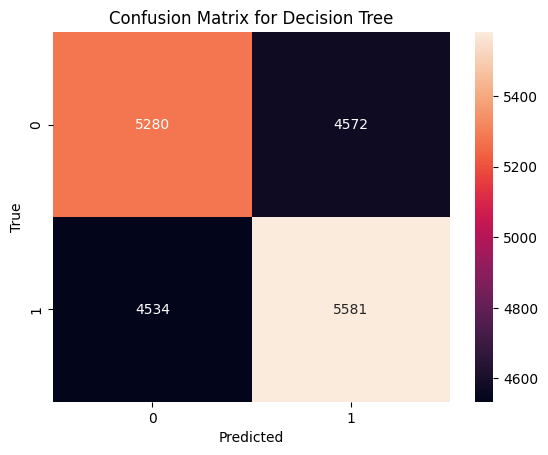

Decision Tree Accuracy: 0.5439475133971052
Training Random Forest...

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.61      0.60      0.61      9852
           1       0.62      0.62      0.62     10115

    accuracy                           0.61     19967
   macro avg       0.61      0.61      0.61     19967
weighted avg       0.61      0.61      0.61     19967


Confusion Matrix for Random Forest:


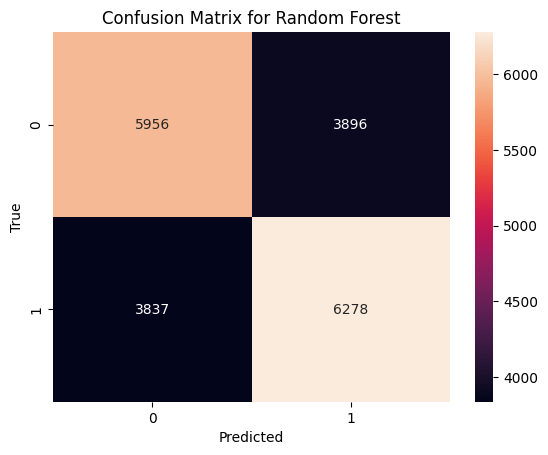

Random Forest Accuracy: 0.6127109731056243
Training Logistic Regression...

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44      9852
           1       0.55      0.79      0.65     10115

    accuracy                           0.57     19967
   macro avg       0.58      0.57      0.54     19967
weighted avg       0.58      0.57      0.55     19967


Confusion Matrix for Logistic Regression:


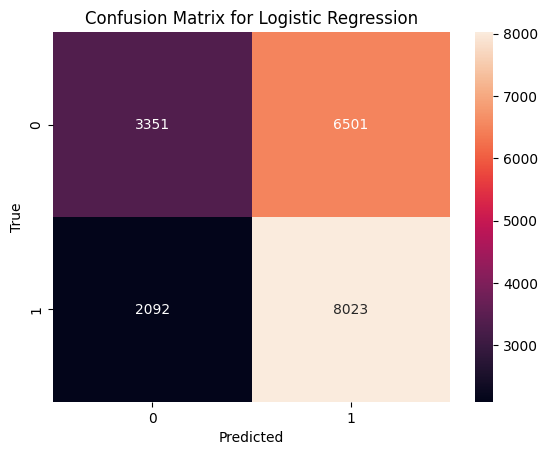

Logistic Regression Accuracy: 0.5696399058446436
Training XGBoost...

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.59      0.60      9852
           1       0.61      0.64      0.63     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.61      0.61     19967
weighted avg       0.62      0.62      0.61     19967


Confusion Matrix for XGBoost:


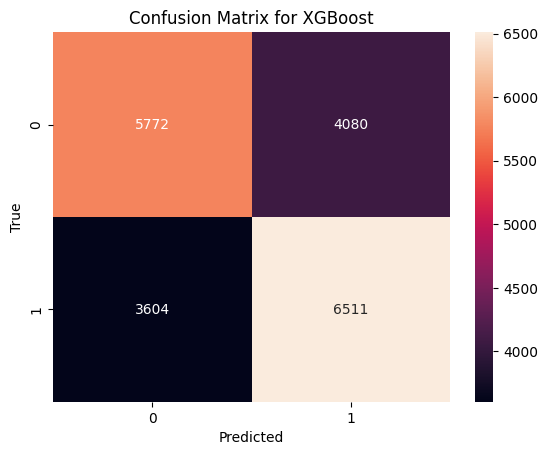

XGBoost Accuracy: 0.6151650222867732
Training LightGBM...
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5605
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 144
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      9852
           1       0.62      0.66      0.64     10115

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967


Confusion Matrix fo

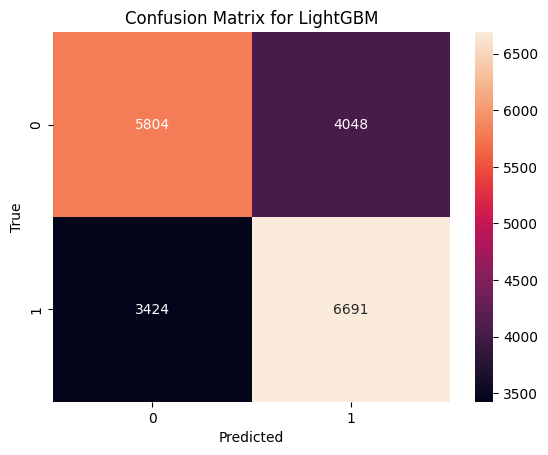

LightGBM Accuracy: 0.6257825411929684


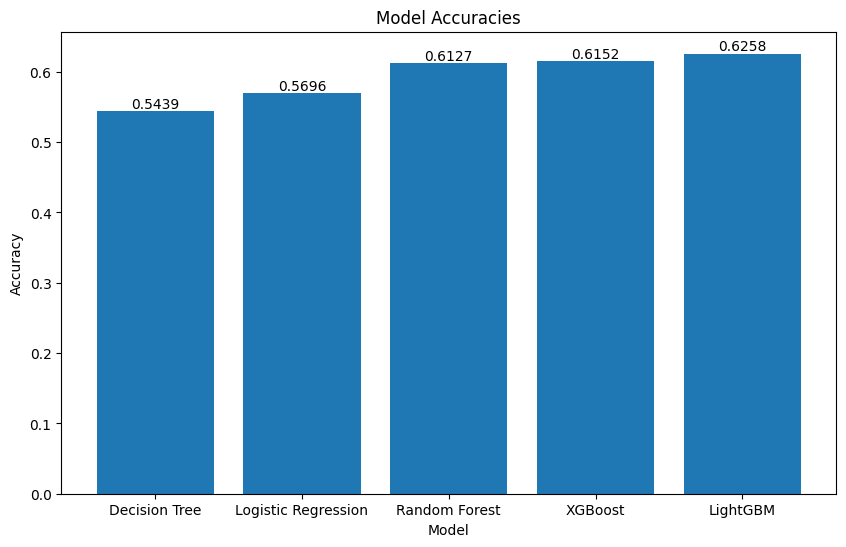

In [40]:
# fitting SVM , Decision tree , Random forest , Logistic regresson , xgboost , lightgbm  and other classification models to the dataset and give confusion matrix , classification report and plot the model accuracies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_transformed3, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Initialize classifiers
classifiers = {

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

model_accuracies = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracy = clf.score(X_test, y_test)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


# Plot model accuracies
plt.figure(figsize=(10, 6))
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1])
plt.bar([x[0] for x in sorted_accuracies], [x[1] for x in sorted_accuracies])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
for i, (model, accuracy) in enumerate(sorted_accuracies):
    plt.text(i, accuracy, f"{accuracy:.4f}", ha='center', va='bottom')
plt.show()


# Feature selection

# using Correlation 

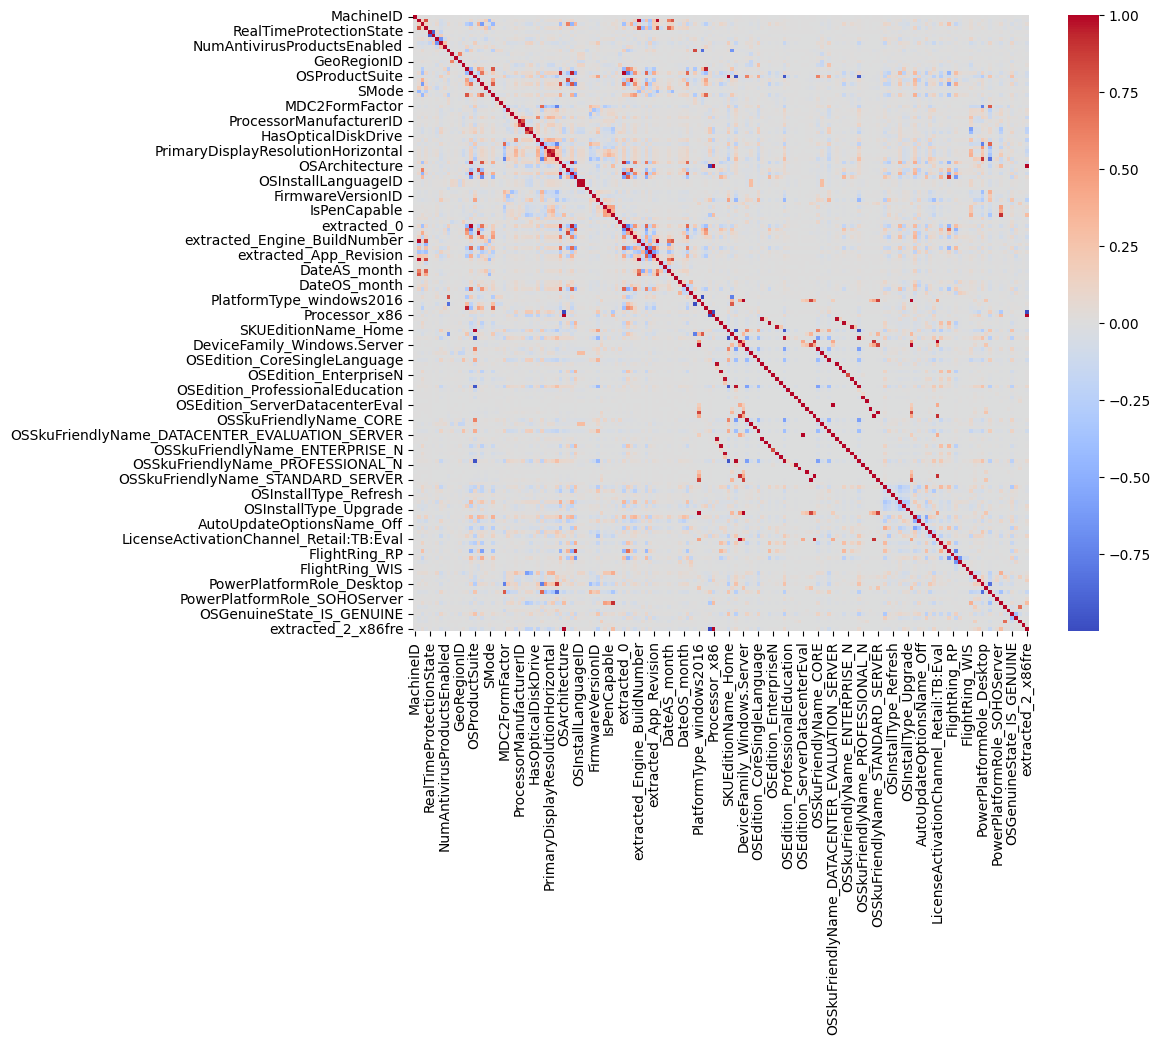

In [41]:
#give code to find the correlation of features (dataset X_transformed3) with each other and drop highly correlated features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X_transformed3.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

# Identify highly correlated features
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_features.append(corr_matrix.columns[i])

# Drop highly correlated features
X_transformed4 = X_transformed3.drop(high_corr_features, axis=1)

# Checking model fits

Training Decision Tree...

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54      9852
           1       0.55      0.55      0.55     10115

    accuracy                           0.55     19967
   macro avg       0.55      0.55      0.55     19967
weighted avg       0.55      0.55      0.55     19967


Confusion Matrix for Decision Tree:


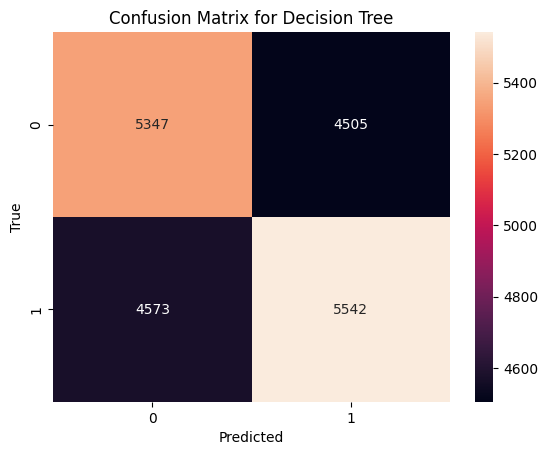

Decision Tree Accuracy: 0.5453498272149045
Training Random Forest...

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      9852
           1       0.62      0.62      0.62     10115

    accuracy                           0.61     19967
   macro avg       0.61      0.61      0.61     19967
weighted avg       0.61      0.61      0.61     19967


Confusion Matrix for Random Forest:


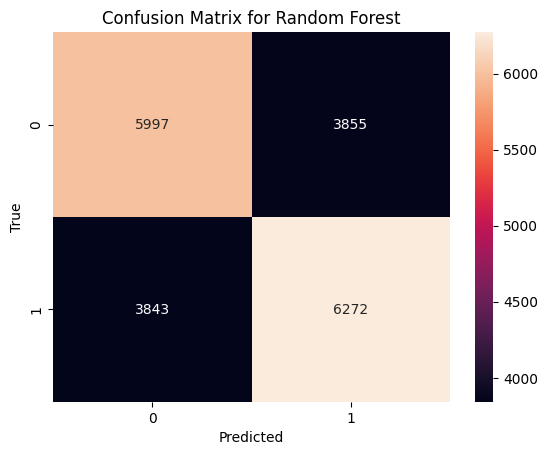

Random Forest Accuracy: 0.6144638653778735
Training Logistic Regression...

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.61      0.33      0.43      9852
           1       0.55      0.80      0.65     10115

    accuracy                           0.57     19967
   macro avg       0.58      0.56      0.54     19967
weighted avg       0.58      0.57      0.54     19967


Confusion Matrix for Logistic Regression:


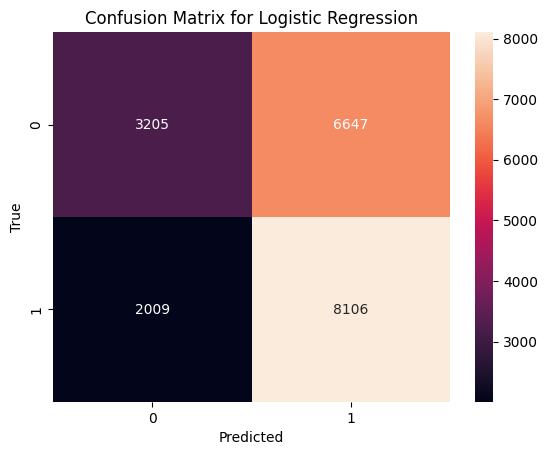

Logistic Regression Accuracy: 0.566484699754595
Training XGBoost...

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60      9852
           1       0.62      0.66      0.64     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.62      0.62     19967
weighted avg       0.62      0.62      0.62     19967


Confusion Matrix for XGBoost:


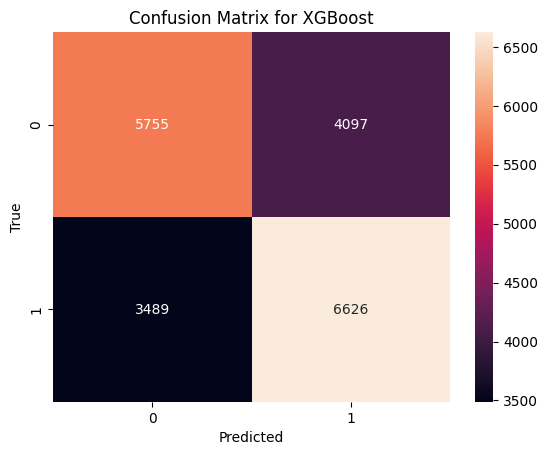

XGBoost Accuracy: 0.6200731206490709
Training LightGBM...
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4592
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 105
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      9852
           1       0.62      0.66      0.64     10115

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967


Confusion Matrix fo

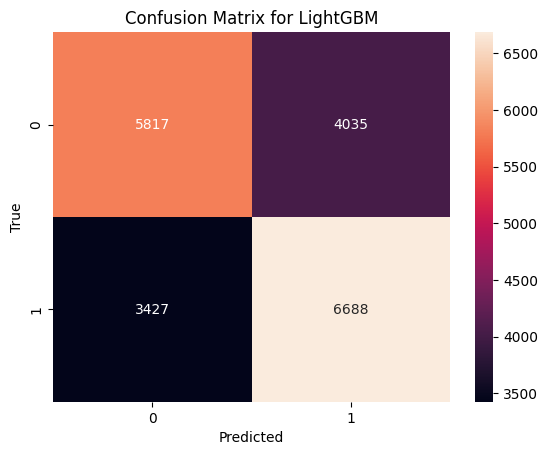

LightGBM Accuracy: 0.6262833675564682


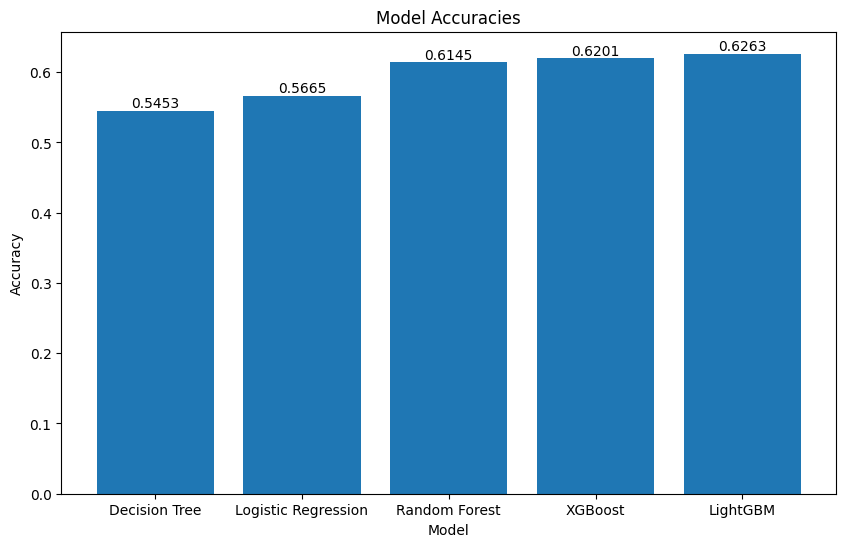

In [42]:
# Decision tree , Random forest , Logistic regresson , xgboost , lightgbm  and other classification models to the dataset and give confusion matrix , classification report and plot the model accuracies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_transformed4, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Initialize classifiers
classifiers = {

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

model_accuracies = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracy = clf.score(X_test, y_test)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


# Plot model accuracies
plt.figure(figsize=(10, 6))
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1])
plt.bar([x[0] for x in sorted_accuracies], [x[1] for x in sorted_accuracies])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
for i, (model, accuracy) in enumerate(sorted_accuracies):
    plt.text(i, accuracy, f"{accuracy:.4f}", ha='center', va='bottom')
plt.show()


# using PCA and retaining 99% variance

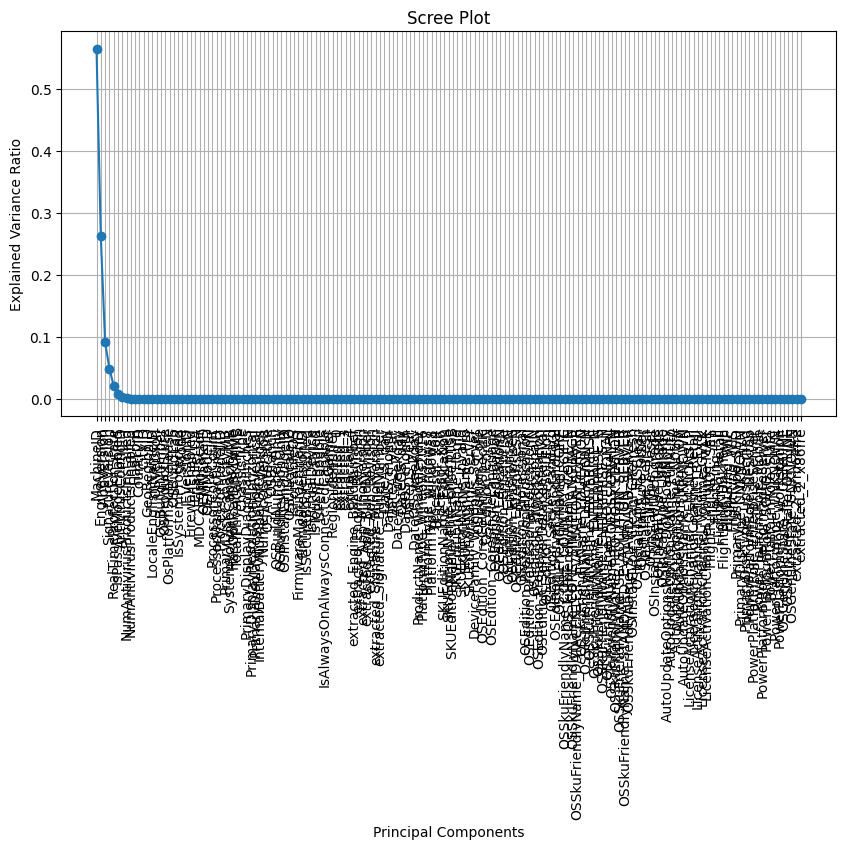

PCA performed with 0.99 components.
Shape of the reduced data: (99835, 6)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X_processed = X_transformed3
# Assuming X_processed is a DataFrame with original feature names
feature_names = X_processed.columns if isinstance(X_processed, pd.DataFrame) else [f"Feature {i+1}" for i in range(X_processed.shape[1])]

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_processed)

# Scree plot with feature names
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xticks(ticks=range(1, len(feature_names) + 1), labels=feature_names, rotation=90)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Select number of components based on the scree plot (replace with your chosen value)
num_components = 0.99 

# Apply PCA with the selected number of components
pca_selected = PCA(n_components=num_components)
X_pca_selected = pca_selected.fit_transform(X_processed)

print(f"PCA performed with {num_components} components.")
print(f"Shape of the reduced data: {X_pca_selected.shape}")


# Model after PCA selected features

Training Decision Tree...

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      9852
           1       0.53      0.53      0.53     10115

    accuracy                           0.52     19967
   macro avg       0.52      0.52      0.52     19967
weighted avg       0.52      0.52      0.52     19967


Confusion Matrix for Decision Tree:


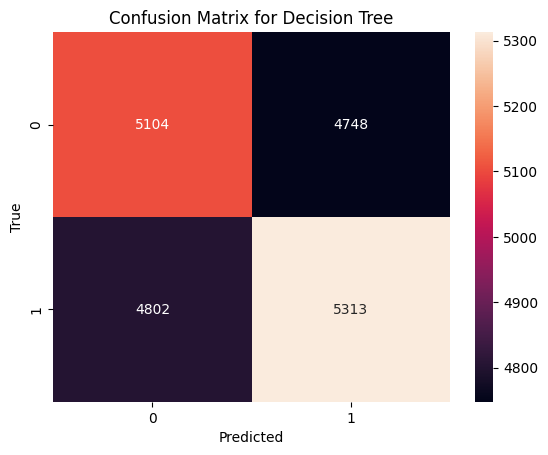

Decision Tree Accuracy: 0.5217108228577152
Training Random Forest...

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55      9852
           1       0.56      0.56      0.56     10115

    accuracy                           0.56     19967
   macro avg       0.56      0.56      0.56     19967
weighted avg       0.56      0.56      0.56     19967


Confusion Matrix for Random Forest:


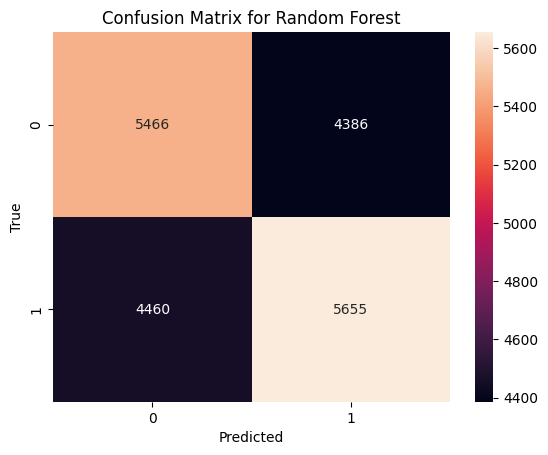

Random Forest Accuracy: 0.5569689988480994
Training Logistic Regression...

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.58      0.35      0.44      9852
           1       0.54      0.75      0.63     10115

    accuracy                           0.55     19967
   macro avg       0.56      0.55      0.53     19967
weighted avg       0.56      0.55      0.54     19967


Confusion Matrix for Logistic Regression:


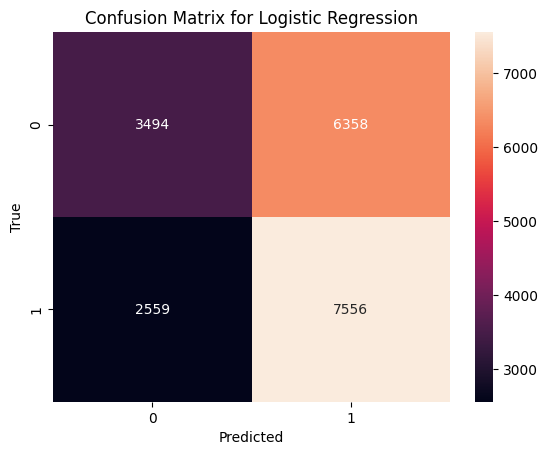

Logistic Regression Accuracy: 0.5534131316672509
Training XGBoost...

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.59      0.51      0.54      9852
           1       0.58      0.66      0.61     10115

    accuracy                           0.58     19967
   macro avg       0.58      0.58      0.58     19967
weighted avg       0.58      0.58      0.58     19967


Confusion Matrix for XGBoost:


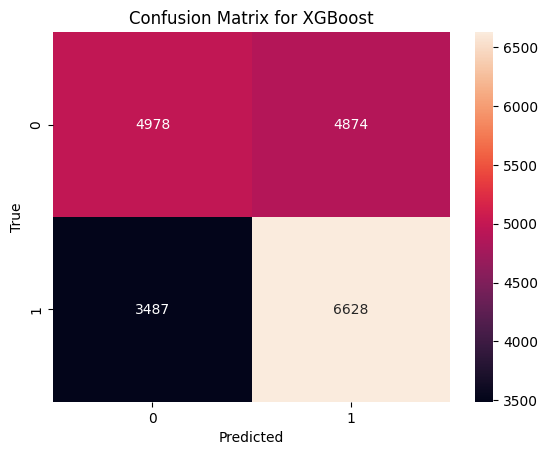

XGBoost Accuracy: 0.5812590774778384
Training LightGBM...
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.60      0.48      0.54      9852
           1       0.58      0.69      0.63     10115

    accuracy                           0.59     19967
   macro avg       0.59      0.59      0.58     19967
weighted avg       0.59      0.59      0.58     19967


Confusion Matrix for LightGBM:


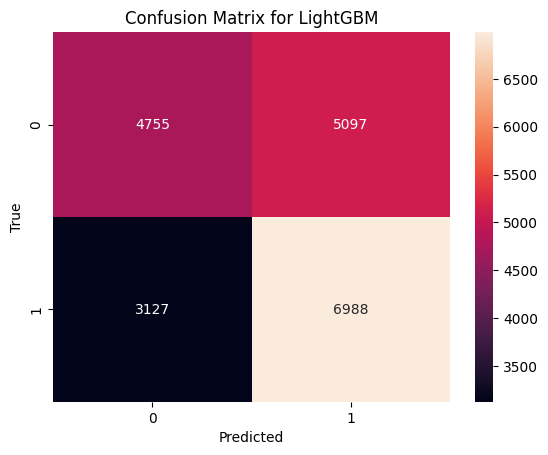

LightGBM Accuracy: 0.5881203986577853


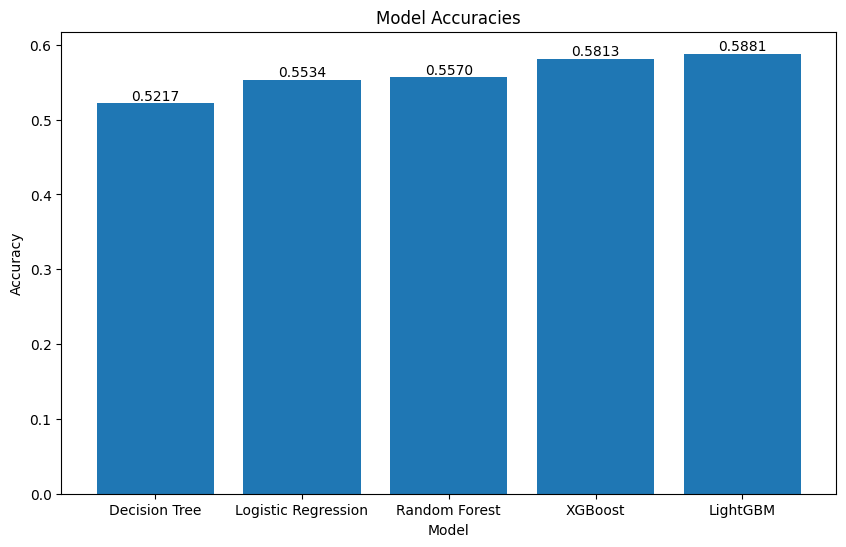

In [44]:
# Decision tree , Random forest , Logistic regresson , xgboost , lightgbm  and other classification models to the dataset and give confusion matrix , classification report and plot the model accuracies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed



# Initialize classifiers
classifiers = {

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

model_accuracies = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracy = clf.score(X_test, y_test)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


# Plot model accuracies
plt.figure(figsize=(10, 6))
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1])
plt.bar([x[0] for x in sorted_accuracies], [x[1] for x in sorted_accuracies])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
for i, (model, accuracy) in enumerate(sorted_accuracies):
    plt.text(i, accuracy, f"{accuracy:.4f}", ha='center', va='bottom')
plt.show()


# Hyperparameter tuning for the feature engineered data

Training Models:   0%|          | 0/2 [00:00<?, ?it/s]


Hyperparameter tuning and training XGBoost...



Fitting XGBoost models: 100%|██████████| 100/100 [15:12<00:00,  9.12s/it]



Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.7}

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      9852
           1       0.63      0.67      0.65     10115

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967


Confusion Matrix for XGBoost:


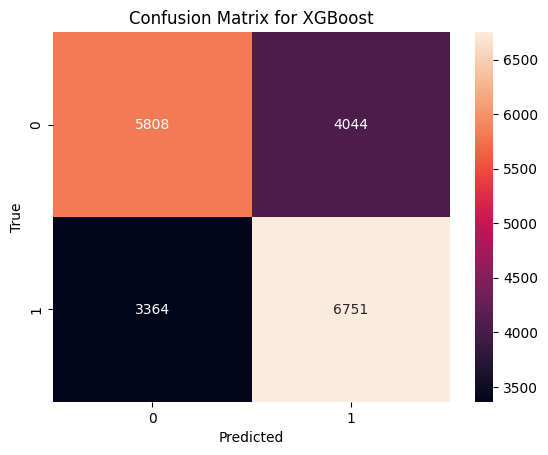

Training Models:  50%|█████     | 1/2 [15:13<15:13, 913.94s/it]

XGBoost Accuracy: 0.628987829919367

Hyperparameter tuning and training LightGBM...



Fitting LightGBM models:   0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5605
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 144
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain


Fitting LightGBM models: 100%|██████████| 100/100 [17:28<00:00, 10.49s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


Best Parameters for LightGBM: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.8, 'num_leaves': 180, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6}

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61      9852
           1       0.62      0.66      0.64     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.62      0.62     19967
weighted avg       0.62      0.62      0.62     19967


Confusion Matrix for LightGBM:


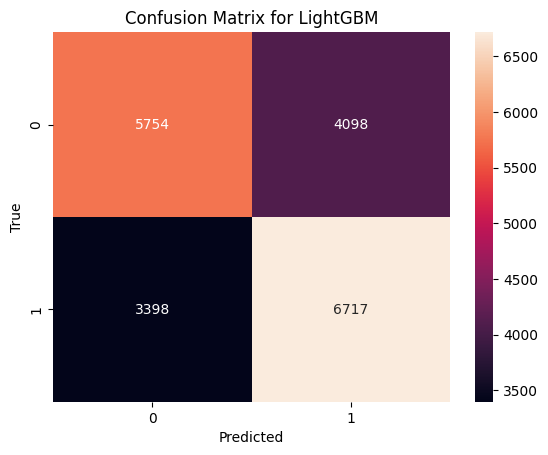

Training Models: 100%|██████████| 2/2 [32:43<00:00, 981.60s/it]

LightGBM Accuracy: 0.624580557920569


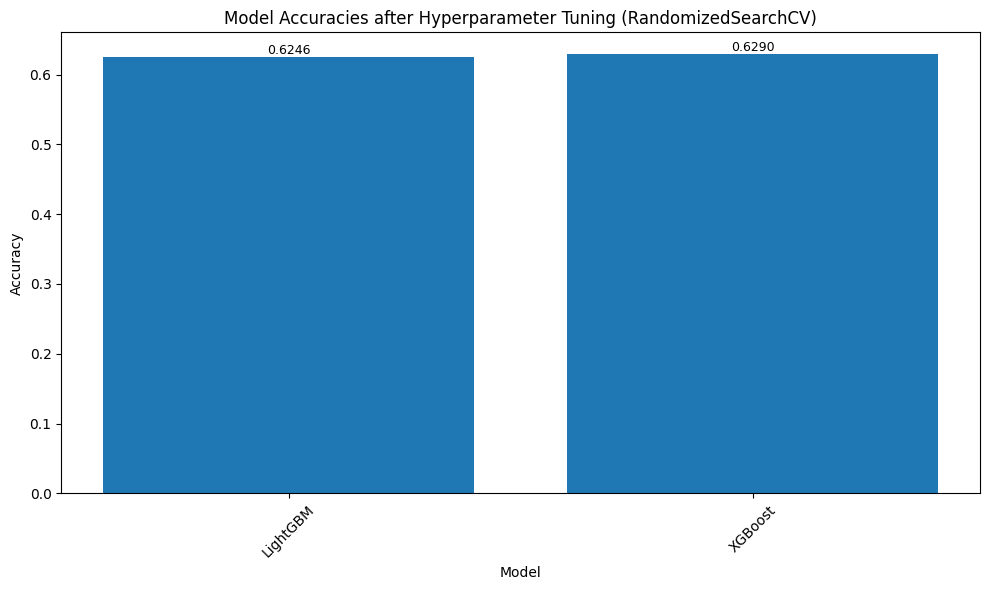

In [45]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress bar
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed3, y, test_size=0.2, random_state=42)

# Clean feature names
import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Define classifiers with their respective hyperparameter grids
classifiers = {
    "XGBoost": {
        "classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": np.arange(100, 1000, 100),
            "max_depth": np.arange(3, 15, 1),
            "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
            "subsample": np.linspace(0.5, 1.0, 6),
            "colsample_bytree": np.linspace(0.5, 1.0, 6),
            "gamma": np.linspace(0, 1, 11)
        }
    },
    "LightGBM": {
        "classifier": LGBMClassifier(random_state=42),
        "params": {
            "n_estimators": np.arange(100, 1000, 100),
            "max_depth": np.arange(3, 15, 1),
            "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
            "num_leaves": np.arange(20, 200, 20),
            "subsample": np.linspace(0.5, 1.0, 6),
            "colsample_bytree": np.linspace(0.5, 1.0, 6),
            "reg_alpha": np.linspace(0, 1, 11),
            "reg_lambda": np.linspace(0, 1, 11)
        }
    }
}

# Dictionary to store model accuracies
model_accuracies = {}

# Dictionary to store the best estimators
best_estimators2 = {}

# Perform hyperparameter tuning and evaluation with tqdm progress bar
for name, config in tqdm(classifiers.items(), desc="Training Models"):
    print(f"\nHyperparameter tuning and training {name}...")
    
    # RandomizedSearchCV for hyperparameter tuning
    clf = RandomizedSearchCV(
        estimator=config["classifier"],
        param_distributions=config["params"],
        n_iter=30,  # Number of parameter settings that are sampled
        scoring='accuracy',
        cv=3,  # 3-fold cross-validation
        n_jobs=-1,  # Use all available cores
        random_state=42
    )
    
    # Fit the model with tqdm progress bar
    with tqdm(total=100, desc=f"Fitting {name} models") as pbar:
        clf.fit(X_train, y_train)
        pbar.update(100)
    
    # Get the best model
    best_model = clf.best_estimator_
    
    # Store the best estimator in the dictionary
    best_estimators2[name] = best_model
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print(f"\nBest Parameters for {name}: {clf.best_params_}")
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Calculate accuracy
    accuracy = best_model.score(X_test, y_test)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Sort the model_accuracies dictionary by values (accuracies) in ascending order
sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda item: item[1]))

import matplotlib.pyplot as plt

# Assuming sorted_accuracies is a dictionary with model names as keys and accuracies as values
# Sort the accuracies in ascending order
sorted_accuracies = dict(sorted(sorted_accuracies.items(), key=lambda item: item[1]))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_accuracies.keys(), sorted_accuracies.values())

# Adding labels on top of each bar with 4 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.4f}',  # Format accuracy to 4 decimal places
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies after Hyperparameter Tuning (RandomizedSearchCV)")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Now you can access the best estimators from the best_estimators dictionary
# For example, to train the best Random Forest model on new data:
# best_rf_model = best_estimators["Random Forest"]
# best_rf_model.fit(new_X_train, new_y_train)

# Hyperparameter tuning for non feature engineered data

Training Models:   0%|          | 0/2 [00:00<?, ?it/s]


Hyperparameter tuning and training XGBoost...



Fitting XGBoost models: 100%|██████████| 100/100 [13:24<00:00,  8.04s/it]



Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.7000000000000001, 'colsample_bytree': 0.6}

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61      9852
           1       0.62      0.66      0.64     10115

    accuracy                           0.62     19967
   macro avg       0.63      0.62      0.62     19967
weighted avg       0.63      0.62      0.62     19967


Confusion Matrix for XGBoost:


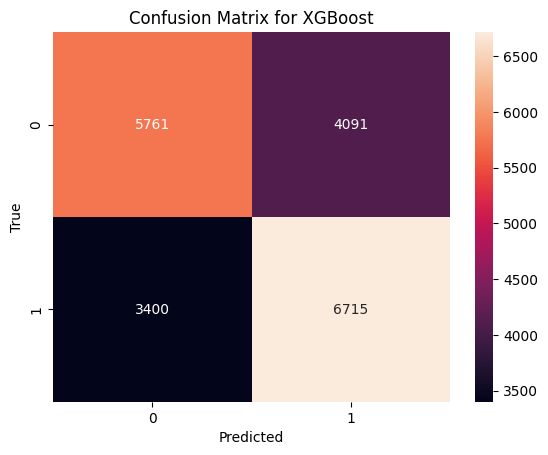

Training Models:  50%|█████     | 1/2 [13:24<13:24, 804.86s/it]

XGBoost Accuracy: 0.6248309711023188

Hyperparameter tuning and training LightGBM...



Fitting LightGBM models:   0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4882
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 132
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain


Fitting LightGBM models: 100%|██████████| 100/100 [15:12<00:00,  9.13s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


Best Parameters for LightGBM: {'subsample': 1.0, 'reg_lambda': 0.30000000000000004, 'reg_alpha': 0.6000000000000001, 'num_leaves': 80, 'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61      9852
           1       0.62      0.67      0.64     10115

    accuracy                           0.63     19967
   macro avg       0.63      0.62      0.62     19967
weighted avg       0.63      0.63      0.62     19967


Confusion Matrix for LightGBM:


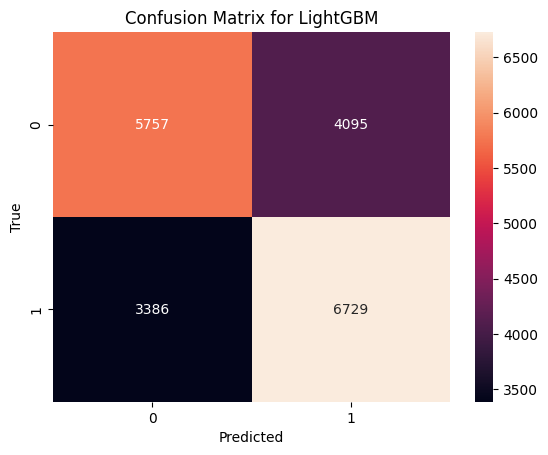

Training Models: 100%|██████████| 2/2 [28:38<00:00, 859.35s/it]

LightGBM Accuracy: 0.6253317974658186


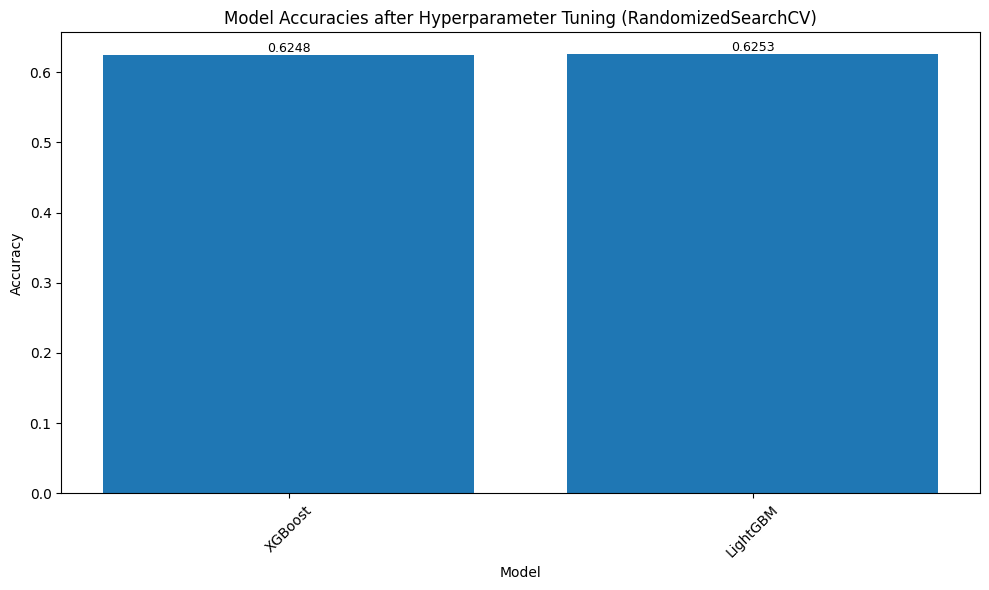

In [46]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress bar
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Clean feature names
import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Define classifiers with their respective hyperparameter grids
classifiers = {
    "XGBoost": {
        "classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": np.arange(100, 1000, 100),
            "max_depth": np.arange(3, 15, 1),
            "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
            "subsample": np.linspace(0.5, 1.0, 6),
            "colsample_bytree": np.linspace(0.5, 1.0, 6),
            "gamma": np.linspace(0, 1, 11)
        }
    },
    "LightGBM": {
        "classifier": LGBMClassifier(random_state=42),
        "params": {
            "n_estimators": np.arange(100, 1000, 100),
            "max_depth": np.arange(3, 15, 1),
            "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
            "num_leaves": np.arange(20, 200, 20),
            "subsample": np.linspace(0.5, 1.0, 6),
            "colsample_bytree": np.linspace(0.5, 1.0, 6),
            "reg_alpha": np.linspace(0, 1, 11),
            "reg_lambda": np.linspace(0, 1, 11)
        }
    }
}

# Dictionary to store model accuracies
model_accuracies = {}

# Dictionary to store the best estimators
best_estimators1= {}

# Perform hyperparameter tuning and evaluation with tqdm progress bar
for name, config in tqdm(classifiers.items(), desc="Training Models"):
    print(f"\nHyperparameter tuning and training {name}...")
    
    # RandomizedSearchCV for hyperparameter tuning
    clf = RandomizedSearchCV(
        estimator=config["classifier"],
        param_distributions=config["params"],
        n_iter=30,  # Number of parameter settings that are sampled
        scoring='accuracy',
        cv=3,  # 3-fold cross-validation
        n_jobs=-1,  # Use all available cores
        random_state=42
    )
    
    # Fit the model with tqdm progress bar
    with tqdm(total=100, desc=f"Fitting {name} models") as pbar:
        clf.fit(X_train, y_train)
        pbar.update(100)
    
    # Get the best model
    best_model = clf.best_estimator_
    
    # Store the best estimator in the dictionary
    best_estimators1[name] = best_model
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print(f"\nBest Parameters for {name}: {clf.best_params_}")
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Calculate accuracy
    accuracy = best_model.score(X_test, y_test)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Sort the model_accuracies dictionary by values (accuracies) in ascending order
sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda item: item[1]))

import matplotlib.pyplot as plt

# Assuming sorted_accuracies is a dictionary with model names as keys and accuracies as values
# Sort the accuracies in ascending order
sorted_accuracies = dict(sorted(sorted_accuracies.items(), key=lambda item: item[1]))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_accuracies.keys(), sorted_accuracies.values())

# Adding labels on top of each bar with 4 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.4f}',  # Format accuracy to 4 decimal places
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies after Hyperparameter Tuning (RandomizedSearchCV)")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Now you can access the best estimators from the best_estimators dictionary
# For example, to train the best Random Forest model on new data:
# best_rf_model = best_estimators["Random Forest"]
# best_rf_model.fit(new_X_train, new_y_train)

# Final submission of model with feature engineering

In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
import lightgbm as lgb
import re
# Load data
test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test

# Clean feature names
def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Separate numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Create imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation on train and test sets
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])


# Function to extract components from version strings
def extract_version_components(version, prefix):
    try:
        parts = version.split('.')
        return {
            f'{prefix}_MajorVersion': int(parts[0]),
            f'{prefix}_MinorVersion': int(parts[1]),
            f'{prefix}_BuildNumber': int(parts[2]),
            f'{prefix}_Revision': int(parts[3])
        }
    except (IndexError, ValueError):
        # Handle invalid version strings
        return {
            f'{prefix}_MajorVersion': None,
            f'{prefix}_MinorVersion': None,
            f'{prefix}_BuildNumber': None,
            f'{prefix}_Revision': None
        }

# Apply feature extraction to each version column
def extract_features_from_versions(df):
    # Extract features for EngineVersion
    engine_features = df['EngineVersion'].apply(extract_version_components, prefix='extracted_Engine').apply(pd.Series)
    df = pd.concat([df, engine_features], axis=1)

    # Extract features for AppVersion
    app_features = df['AppVersion'].apply(extract_version_components, prefix='extracted_App').apply(pd.Series)
    df = pd.concat([df, app_features], axis=1)

    # Extract features for SignatureVersion
    signature_features = df['SignatureVersion'].apply(extract_version_components, prefix='extracted_Signature').apply(pd.Series)
    df = pd.concat([df, signature_features], axis=1)

    return df

# Extract features from version columns
X_train = extract_features_from_versions(X_train)
X_test = extract_features_from_versions(X_test)

# Function to split and prefix OSBuildLab
def split_and_prefix_osbuildlab(df):
    # Split the 'OSBuildLab' column into multiple columns
    split_columns = df['OSBuildLab'].str.split('.', expand=True)
    
    # Add the 'extracted_' prefix to the new columns
    split_columns = split_columns.add_prefix('extracted_')
    
    # Concatenate the new columns with the original DataFrame
    df = pd.concat([df, split_columns], axis=1)
    
    return df

# Apply OSBuildLab feature extraction
X_train = split_and_prefix_osbuildlab(X_train)
X_test = split_and_prefix_osbuildlab(X_test)

# Find number of unique values in all columns
unique_counts_train = X_train.nunique()
unique_counts_test = X_test.nunique()

# Print columns with only one unique value
single_unique_value_columns_train = unique_counts_train[unique_counts_train == 1].index.tolist()
single_unique_value_columns_test = unique_counts_test[unique_counts_test == 1].index.tolist()

print("Columns with only one unique value in training set:", single_unique_value_columns_train)
print("Columns with only one unique value in test set:", single_unique_value_columns_test)

# Drop columns with only one unique value
X_train = X_train.drop(columns=single_unique_value_columns_train, errors='ignore')
X_test = X_test.drop(columns=single_unique_value_columns_test, errors='ignore')

# Convert extracted columns to integers
extracted_columns = ['extracted_0', 'extracted_1']
for col in extracted_columns:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(int)
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(int)



# Columns to exclude, label encode, one-hot encode, and scale
exclude_columns = [
    'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID',
    'LocaleEnglishNameID', 'OEMNameID', 'OEMModelID', 'ProcessorManufacturerID',
    'ProcessorModelID', 'RegionIdentifier', 'DateAS', 'DateOS', 'target', 'NumericOSVersion', 'OSBuildNumberOnly',
    'OSBuildRevisionOnly'
]

label_encode_columns = [
    'RealTimeProtectionState', 'IsPassiveModeEnabled', 'HasTpm',
    'IsSystemProtected', 'SMode', 'FirewallEnabled',
    'EnableLUA', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
    'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',  'EngineVersion', 'AppVersion', 'SignatureVersion', 'MachineID', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'MDC2FormFactor',
    'NumericOSVersion', 'OSArchitecture', 'OSBranch',"HasOpticalDiskDrive",'ChassisType',"IsPortableOS","extracted_4","extracted_3"
]

one_hot_encode_columns = [
    'ProductName', 'PlatformType', 'Processor', 'SKUEditionName', 'DeviceFamily',
     'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'LicenseActivationChannel', 'FlightRing',
    'PrimaryDiskType', 'PowerPlatformRole','OSGenuineState',"extracted_2"
]

scale_columns = [
    'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB',
    'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches',
    'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
    'InternalBatteryNumberOfCharges',
]
# Perform Label Encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
for col in label_encode_columns:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

# Perform One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
one_hot_encoded_train = one_hot_encoder.fit_transform(X_train[one_hot_encode_columns])
one_hot_encoded_test = one_hot_encoder.transform(X_test[one_hot_encode_columns])

# Create DataFrames from the one-hot encoded arrays
one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))

# Drop the original one-hot encode columns and concatenate the new one-hot encoded DataFrames
X_train = X_train.drop(columns=one_hot_encode_columns)
X_test = X_test.drop(columns=one_hot_encode_columns)

X_train = pd.concat([X_train, one_hot_encoded_train_df], axis=1)
X_test = pd.concat([X_test, one_hot_encoded_test_df], axis=1)

# Perform Standard Scaling
scaler = StandardScaler()
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

# Extract features from DateAS and DateOS
X_train['DateAS'] = pd.to_datetime(X_train['DateAS'])
X_train['DateOS'] = pd.to_datetime(X_train['DateOS'])

X_train['DateAS_day'] = X_train['DateAS'].dt.day
X_train['DateAS_month'] = X_train['DateAS'].dt.month
X_train['DateAS_year'] = X_train['DateAS'].dt.year
X_train['DateAS_weekday'] = X_train['DateAS'].dt.weekday

X_train['DateOS_day'] = X_train['DateOS'].dt.day
X_train['DateOS_month'] = X_train['DateOS'].dt.month
X_train['DateOS_year'] = X_train['DateOS'].dt.year
X_train['DateOS_weekday'] = X_train['DateOS'].dt.weekday

X_train = X_train.drop(columns=['DateAS', 'DateOS'])

X_test['DateAS'] = pd.to_datetime(X_test['DateAS'])
X_test['DateOS'] = pd.to_datetime(X_test['DateOS'])

X_test['DateAS_day'] = X_test['DateAS'].dt.day
X_test['DateAS_month'] = X_test['DateAS'].dt.month
X_test['DateAS_year'] = X_test['DateAS'].dt.year
X_test['DateAS_weekday'] = X_test['DateAS'].dt.weekday

X_test['DateOS_day'] = X_test['DateOS'].dt.day
X_test['DateOS_month'] = X_test['DateOS'].dt.month
X_test['DateOS_year'] = X_test['DateOS'].dt.year
X_test['DateOS_weekday'] = X_test['DateOS'].dt.weekday

X_test = X_test.drop(columns=['DateAS', 'DateOS'])


def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)
# Train the XGboost
model = best_estimators2["XGBoost"]
model.fit(X_train, y_train)

# Make predictions on the test set
pred = model.predict(X_test)

# Save predictions to a CSV file
submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": pred})
submission.to_csv("submission.csv", index=False)

Columns with only one unique value in training set: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'extracted_Engine_MajorVersion', 'extracted_Engine_MinorVersion', 'extracted_App_MajorVersion', 'extracted_Signature_MajorVersion', 'extracted_Signature_Revision']
Columns with only one unique value in test set: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'extracted_Engine_MajorVersion', 'extracted_Engine_MinorVersion', 'extracted_App_MajorVersion', 'extracted_Signature_MajorVersion', 'extracted_Signature_Revision']


# Submission of model without feature engineering

In [48]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,OrdinalEncoder
import lightgbm as lgb

# Assuming X_train, X_test, y_train are already loaded

test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X_train=train.drop('target',axis=1)
y_train=train['target']
X_test=test


import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)


import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
import lightgbm as lgb

# Assuming X_train, X_test, y_train are already loaded

# Separate numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Create imputers for numerical and categorical features
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation on train and test sets
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Drop specified columns
columns_to_drop = ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Columns to exclude, label encode, one-hot encode, and scale

exclude_columns = [
    'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID',
    'LocaleEnglishNameID', 'OEMNameID', 'OEMModelID', 'ProcessorManufacturerID',
    'ProcessorModelID', 'RegionIdentifier', 'DateAS', 'DateOS', 'target', 'NumericOSVersion', 'OSBuildNumberOnly',
    'OSBuildRevisionOnly'
]

label_encode_columns = [
    'RealTimeProtectionState', 'IsPassiveModeEnabled', 'HasTpm',
    'IsSystemProtected', 'SMode', 'FirewallEnabled',
    'EnableLUA', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
    'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',  'EngineVersion', 'AppVersion', 'SignatureVersion', 'MachineID', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'MDC2FormFactor',
    'NumericOSVersion', 'OSArchitecture', 'OSBranch',"HasOpticalDiskDrive",'ChassisType',"IsPortableOS"
]

one_hot_encode_columns = [
    'ProductName', 'PlatformType', 'Processor', 'SKUEditionName', 'DeviceFamily',
     'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'LicenseActivationChannel', 'FlightRing',
    'PrimaryDiskType', 'PowerPlatformRole','OSGenuineState'
]

scale_columns = [
    'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB',
    'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches',
    'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
    'InternalBatteryNumberOfCharges',
]


# Perform Label Encoding

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
for col in label_encode_columns:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

# Perform One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
one_hot_encoded_train = one_hot_encoder.fit_transform(X_train[one_hot_encode_columns])
one_hot_encoded_test = one_hot_encoder.transform(X_test[one_hot_encode_columns])

# Create DataFrames from the one-hot encoded arrays
one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoder.get_feature_names_out(one_hot_encode_columns))

# Drop the original one-hot encode columns and concatenate the new one-hot encoded DataFrames
X_train = X_train.drop(columns=one_hot_encode_columns)
X_test = X_test.drop(columns=one_hot_encode_columns)

X_train = pd.concat([X_train, one_hot_encoded_train_df], axis=1)
X_test = pd.concat([X_test, one_hot_encoded_test_df], axis=1)

# Perform Standard Scaling
scaler = StandardScaler()
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

# Extract features from DateAS and DateOS
X_train['DateAS'] = pd.to_datetime(X_train['DateAS'])
X_train['DateOS'] = pd.to_datetime(X_train['DateOS'])

X_train['DateAS_day'] = X_train['DateAS'].dt.day
X_train['DateAS_month'] = X_train['DateAS'].dt.month
X_train['DateAS_year'] = X_train['DateAS'].dt.year
X_train['DateAS_weekday'] = X_train['DateAS'].dt.weekday

X_train['DateOS_day'] = X_train['DateOS'].dt.day
X_train['DateOS_month'] = X_train['DateOS'].dt.month
X_train['DateOS_year'] = X_train['DateOS'].dt.year
X_train['DateOS_weekday'] = X_train['DateOS'].dt.weekday

X_train = X_train.drop(columns=['DateAS', 'DateOS'])

X_test['DateAS'] = pd.to_datetime(X_test['DateAS'])
X_test['DateOS'] = pd.to_datetime(X_test['DateOS'])

X_test['DateAS_day'] = X_test['DateAS'].dt.day
X_test['DateAS_month'] = X_test['DateAS'].dt.month
X_test['DateAS_year'] = X_test['DateAS'].dt.year
X_test['DateAS_weekday'] = X_test['DateAS'].dt.weekday

X_test['DateOS_day'] = X_test['DateOS'].dt.day
X_test['DateOS_month'] = X_test['DateOS'].dt.month
X_test['DateOS_year'] = X_test['DateOS'].dt.year
X_test['DateOS_weekday'] = X_test['DateOS'].dt.weekday

X_test = X_test.drop(columns=['DateAS', 'DateOS'])



import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Train the LightGBM model
model = best_estimators1["XGBoost"]
model.fit(X_train, y_train)

# Make predictions on the test set
pred = model.predict(X_test)

# Save predictions to a CSV file
submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": pred})
submission.to_csv(r"submission1.csv", index=False)